## Artificial Intelligence | 4022 | Dr. Fadaei
## Assignment #04
***
### Amirreza Akbari | 810899045
### 1402/02/31

## Install & Import Libraries

In [292]:
import importlib.util

required_libraries = ["numpy", "pandas", "matplotlib", "seaborn", "openpyxl", "scikit-learn"]

for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        # Install the library
        !pip install {lib}
        
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Part 1: Exploratory Data Analysis 

#### 1. Data Schema

#### 2. Missing Values

#### 3. Unique Values

Columns with a high number of unique values (ranging from 343 to 452) suggest that the features are probably continuous variables with a wide range of values, indicating a high level of granularity in the data.

Columns with a moderate number of unique values (ranging from 67 to 210) suggest that the features are likely continuous and have less variability compared to the first group but still offer a considerable range of values.

Columns with relatively few unique values (27 and 10) could be categorical or discrete variables with a limited set of possible values.

The column with only 2 unique values is indicating a binary variable.


------------------------------------------------------     Head     ------------------------------------------------------

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98 

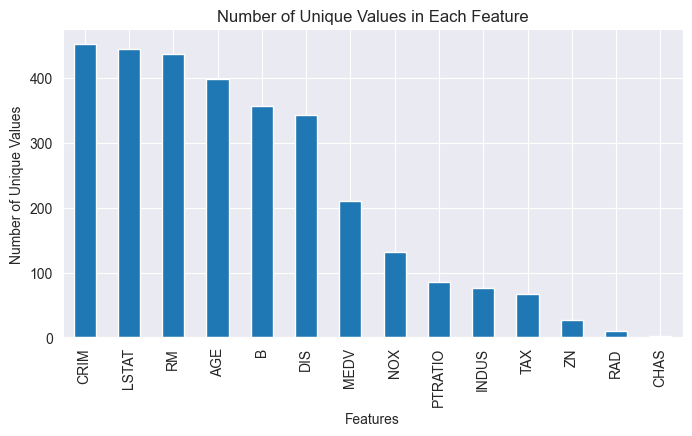

In [293]:
# Load data from Excel file
df = pd.read_excel('DataSet.xlsx')

# First 10 rows of the dataframe
print("\n------------------------------------------------------     Head     ------------------------------------------------------\n")
print(df.head(10))

# Summary information of the dataframe
print("\n------------------------------------------------------     Info     ------------------------------------------------------\n")
print(df.info())

# Descriptive statistics of the dataframe
print("\n----------------------------------------------------     Describe     ----------------------------------------------------\n")
print(df.describe())

# Calculate the number of missing values
missing_count = df.isnull().sum()

# Calculate the ratio of missing values to total values
missing_ratio = missing_count / df.shape[0]

# Display the number of missing values and their ratio in each column
print("\n----------------------------------------------------     Missing     -----------------------------------------------------\n")
missing_df = pd.concat([missing_count, missing_ratio], axis=1, keys=['Number of missing values', 'Ratio to total values'])
missing_df = missing_df[missing_df['Number of missing values'] > 0]
print(missing_df)

# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Sort the unique counts
unique_counts_sorted = unique_counts.sort_values(ascending=False)

# Display the sorted unique counts
print("\n-------------------------------------------------     Unique Values     --------------------------------------------------\n")
print(unique_counts_sorted)

# Plot the sorted unique counts
plt.figure(figsize=(8, 4))
unique_counts_sorted.plot(kind='bar')
plt.title('Number of Unique Values in Each Feature')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.show()

#### 4. Correlation Matrix

A correlation matrix is a table that shows the correlation coefficients between variables.
Each cell in the matrix represents the correlation between two variables. The correlation coefficient ranges from -1 to 1:

+1  indicates a perfect positive correlation.
-1  indicates a perfect negative correlation.
0   indicates no correlation.


-----------------------------------------------     Correlation Matrix     -----------------------------------------------


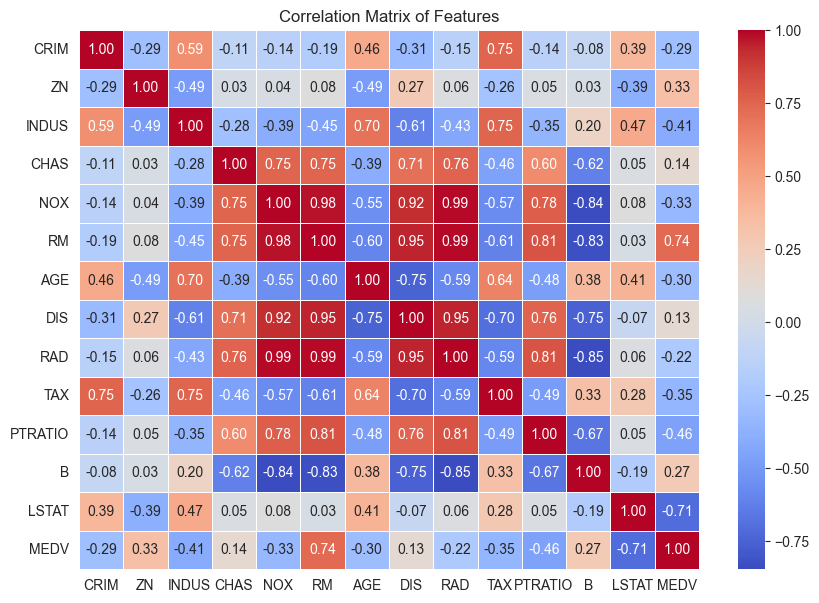


---------------------------------------     Sorted Absolute Correlations with MEDV     -----------------------------------

MEDV       1.00
RM         0.74
LSTAT      0.71
PTRATIO    0.46
INDUS      0.41
TAX        0.35
NOX        0.33
ZN         0.33
AGE        0.30
CRIM       0.29
B          0.27
RAD        0.22
CHAS       0.14
DIS        0.13
Name: MEDV, dtype: float64


In [294]:
# Generate and plot the correlation matrix
print("\n-----------------------------------------------     Correlation Matrix     -----------------------------------------------\n")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Calculate the absolute correlations with the target feature (MEDV)
correlations_with_target = correlation_matrix['MEDV'].abs()

# Sort the absolute correlations with the target feature
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Print the sorted correlations
print("\n---------------------------------------     Sorted Absolute Correlations with MEDV     -----------------------------------\n")
print(sorted_correlations.round(2))


#### 5. Scatter & Hexbin Plots

Scatter Plot:

A scatter plot is a type of data visualization that displays individual data points as dots.
Each dot represents the values of two variables, one plotted along the x-axis and the other along the y-axis.
Scatter plots are useful for visualizing the relationship between two continuous variables.
They can help identify patterns, trends, and correlations between variables.
Common use cases include:
    Exploring the relationship between two variables.
    Identifying outliers and clusters within the data.
    Assessing the strength and direction of correlation between variables.

Hexbin Plot:

A hexbin plot is a variation of a scatter plot where data points are aggregated into hexagonal bins.
The color intensity or density of points within each bin represents the number of data points in that bin.
Hexbin plots are particularly useful when dealing with large datasets where individual data points may overlap and obscure patterns.
They provide a clearer representation of the distribution and density of data points.
Common use cases include:
    Visualizing the relationship between two variables, especially when dealing with large datasets.
    Identifying areas of high density or clustering within the data.
    Providing a smoother representation of the data compared to traditional scatter plots.


--------------------------------------------------     Scatter Plots     --------------------------------------------------


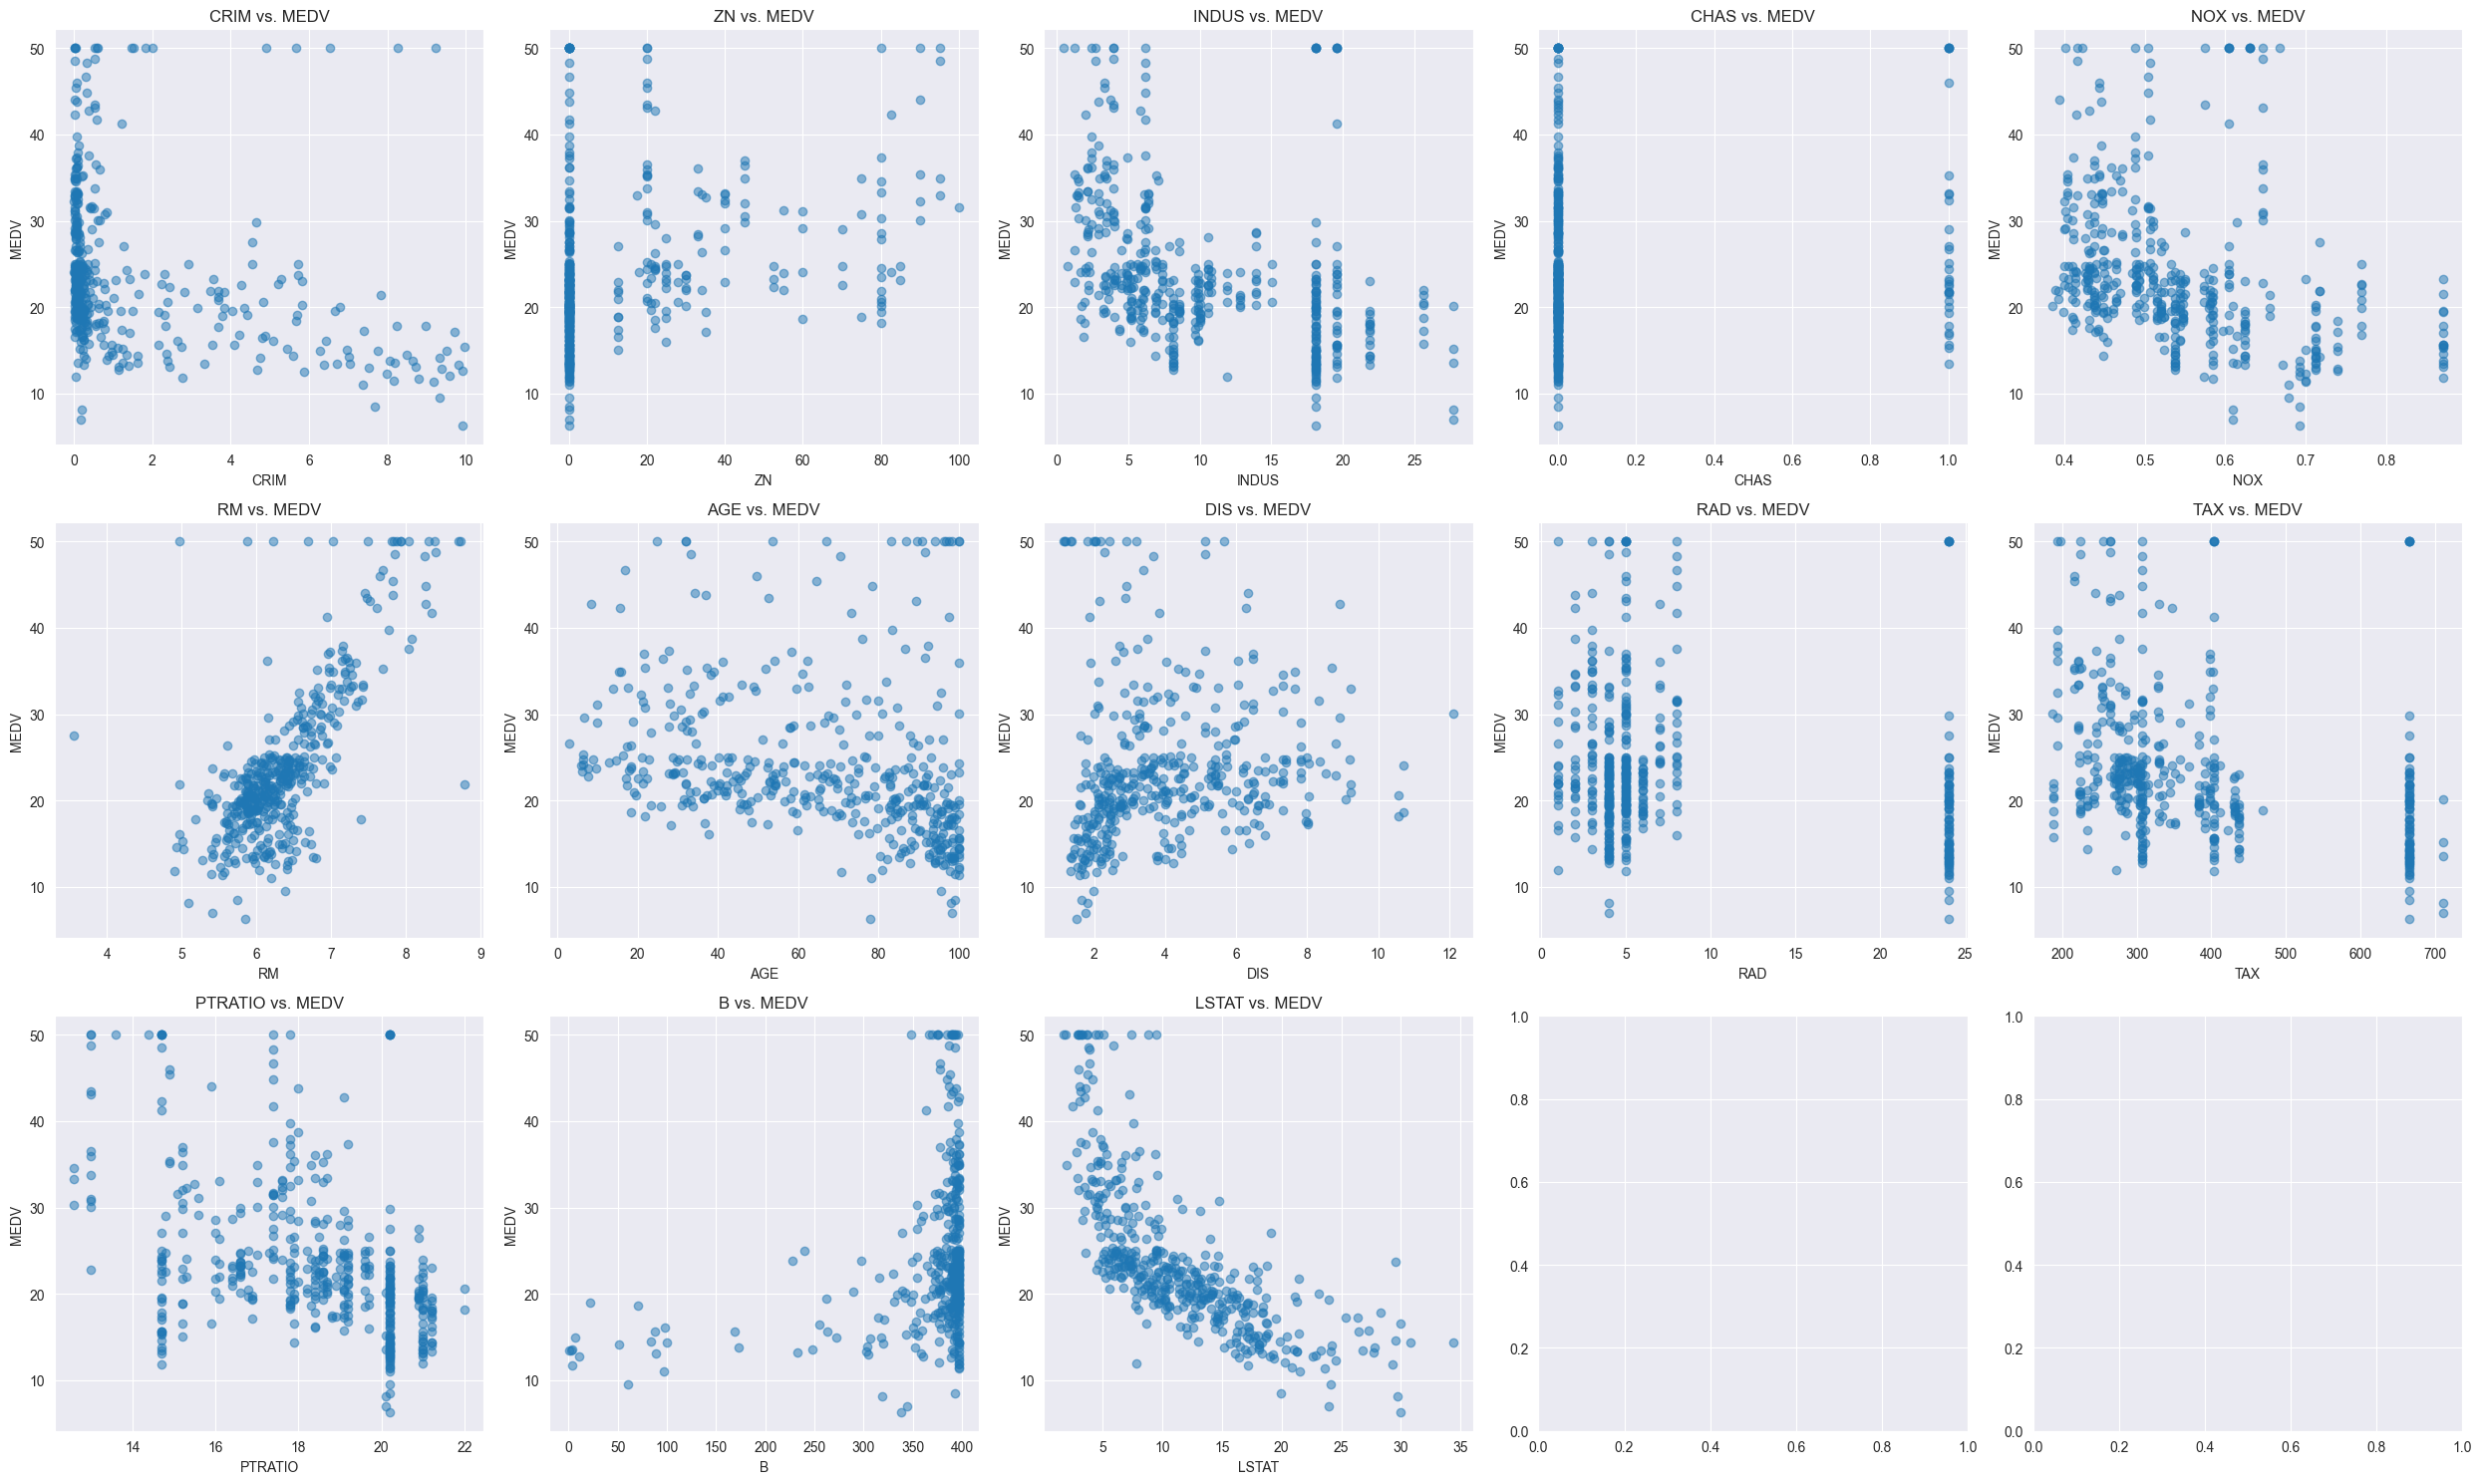


---------------------------------------------------     Hexbin Plots     --------------------------------------------------


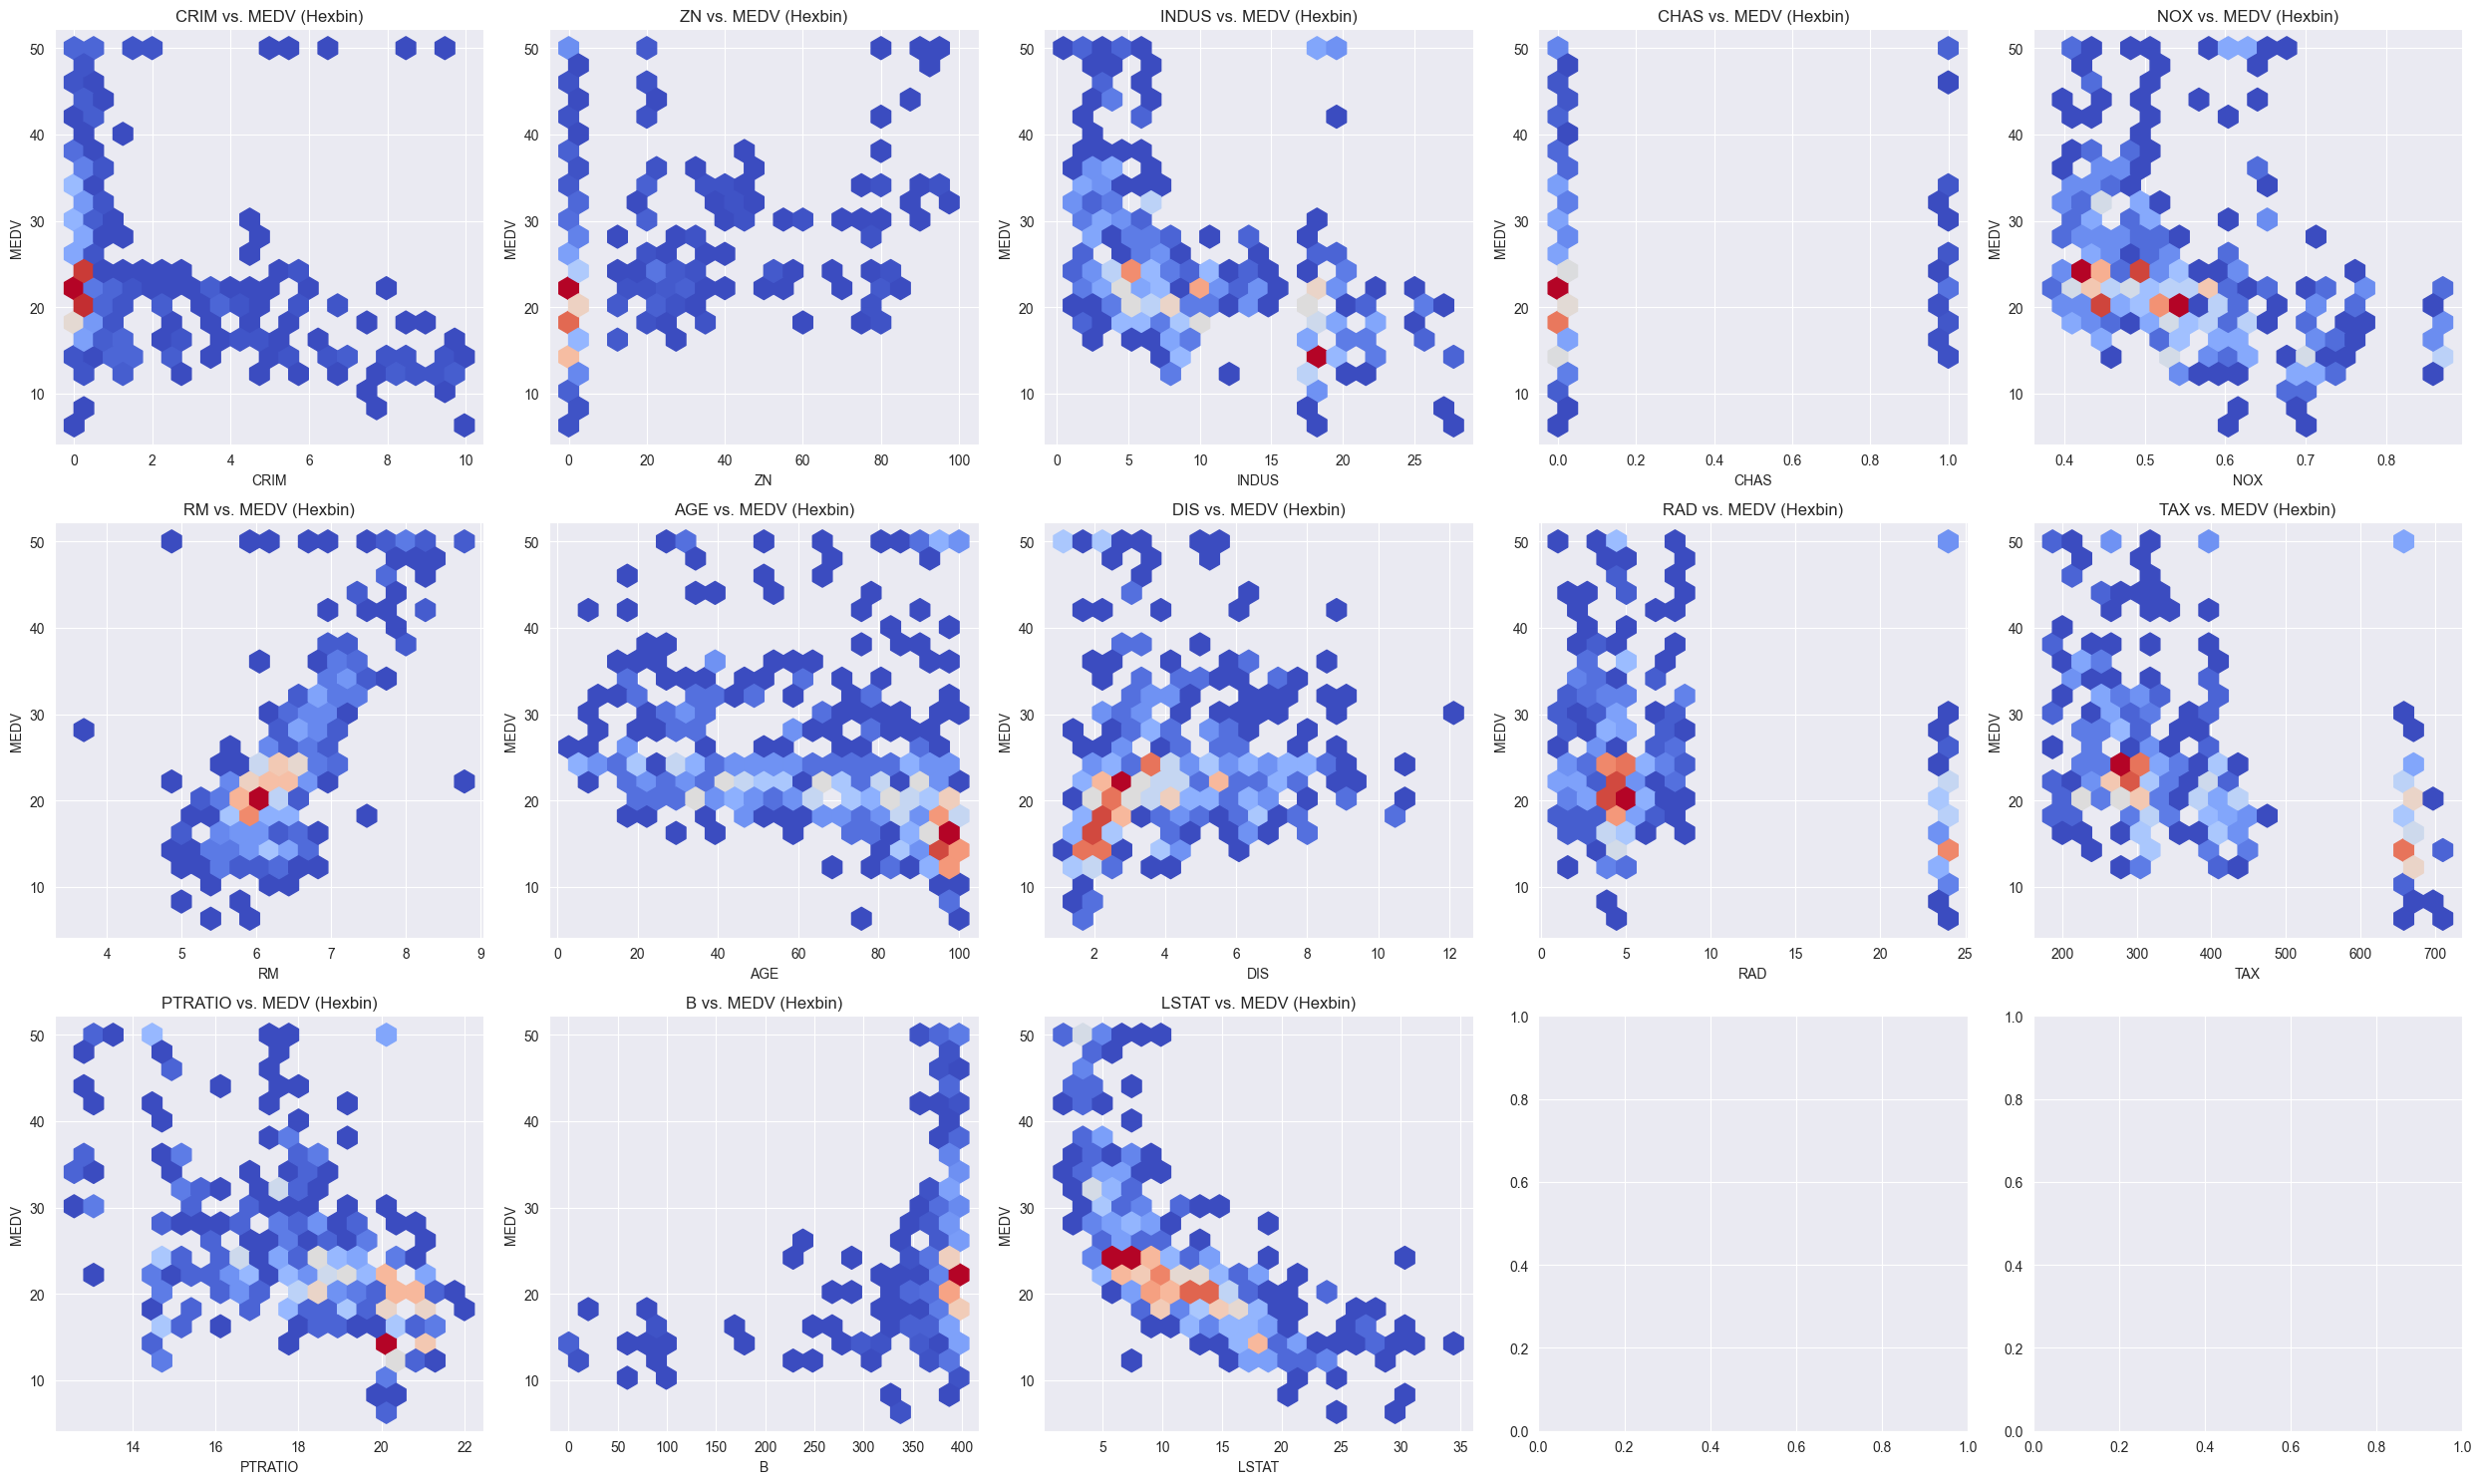

In [295]:
# Generate scatter plots and hexbin plots for features against the target feature (MEDV)
features = df.columns.drop('MEDV')  # Exclude the target feature from features
target_feature = 'MEDV'
print("\n--------------------------------------------------     Scatter Plots     --------------------------------------------------\n")
# Scatter plots
num_rows = (len(features) + 4) // 5  # Calculate the number of rows needed for scatter plots
fig, axs = plt.subplots(num_rows, 5, figsize=(25, 5 * num_rows))

row_idx = 0
col_idx = 0

for feature in features:
    ax = axs[row_idx, col_idx]
    ax.scatter(df[feature], df[target_feature], alpha=0.5)
    ax.set_title(f'{feature} vs. {target_feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target_feature)

    col_idx += 1
    if col_idx >= 5:
        col_idx = 0
        row_idx += 1

plt.tight_layout()
plt.show()

print("\n---------------------------------------------------     Hexbin Plots     --------------------------------------------------\n")
# Hexbin plots
num_rows = (len(features) + 4) // 5  # Calculate the number of rows needed for hexbin plots
fig, axs = plt.subplots(num_rows, 5, figsize=(25, 5 * num_rows))

row_idx = 0
col_idx = 0

for feature in features:
    ax = axs[row_idx, col_idx]
    ax.hexbin(df[feature], df[target_feature], gridsize=20, cmap='coolwarm', mincnt=1)
    ax.set_title(f'{feature} vs. {target_feature} (Hexbin)')
    ax.set_xlabel(feature)
    ax.set_ylabel(target_feature)

    col_idx += 1
    if col_idx >= 5:
        col_idx = 0
        row_idx += 1

plt.tight_layout()
plt.show()


#### 6. Other EDA Methods

Partial Dependence Plots (PDP): These plots visualize the average prediction of a machine learning model for a range of values of a single feature, aiding in understanding the marginal effect of a feature on the target variable.

Statistical Summary: Calculating basic statistics such as mean, median, mode, standard deviation, variance, skewness, and kurtosis provides insights into the central tendency, variability, and shape of the data distribution.

Pairplots: Creating a matrix of scatter plots reveals potential correlations or interactions between features that might not be evident in individual plots.

Feature Importance Analysis: Identifying the most influential features in predictive modeling tasks helps in understanding which features are significant for predicting the target variable.

Correlation Analysis: Analyzing correlation matrices and computing correlation coefficients helps understand the strength and direction of linear relationships between variables.

Distribution Plots: Histograms, violin plots, and box plots visualize the distribution of each feature, aiding in identifying potential outliers, skewness, or patterns in the data that might influence the target variable.


-------------------------------------------------------     Pairplot     ------------------------------------------------------


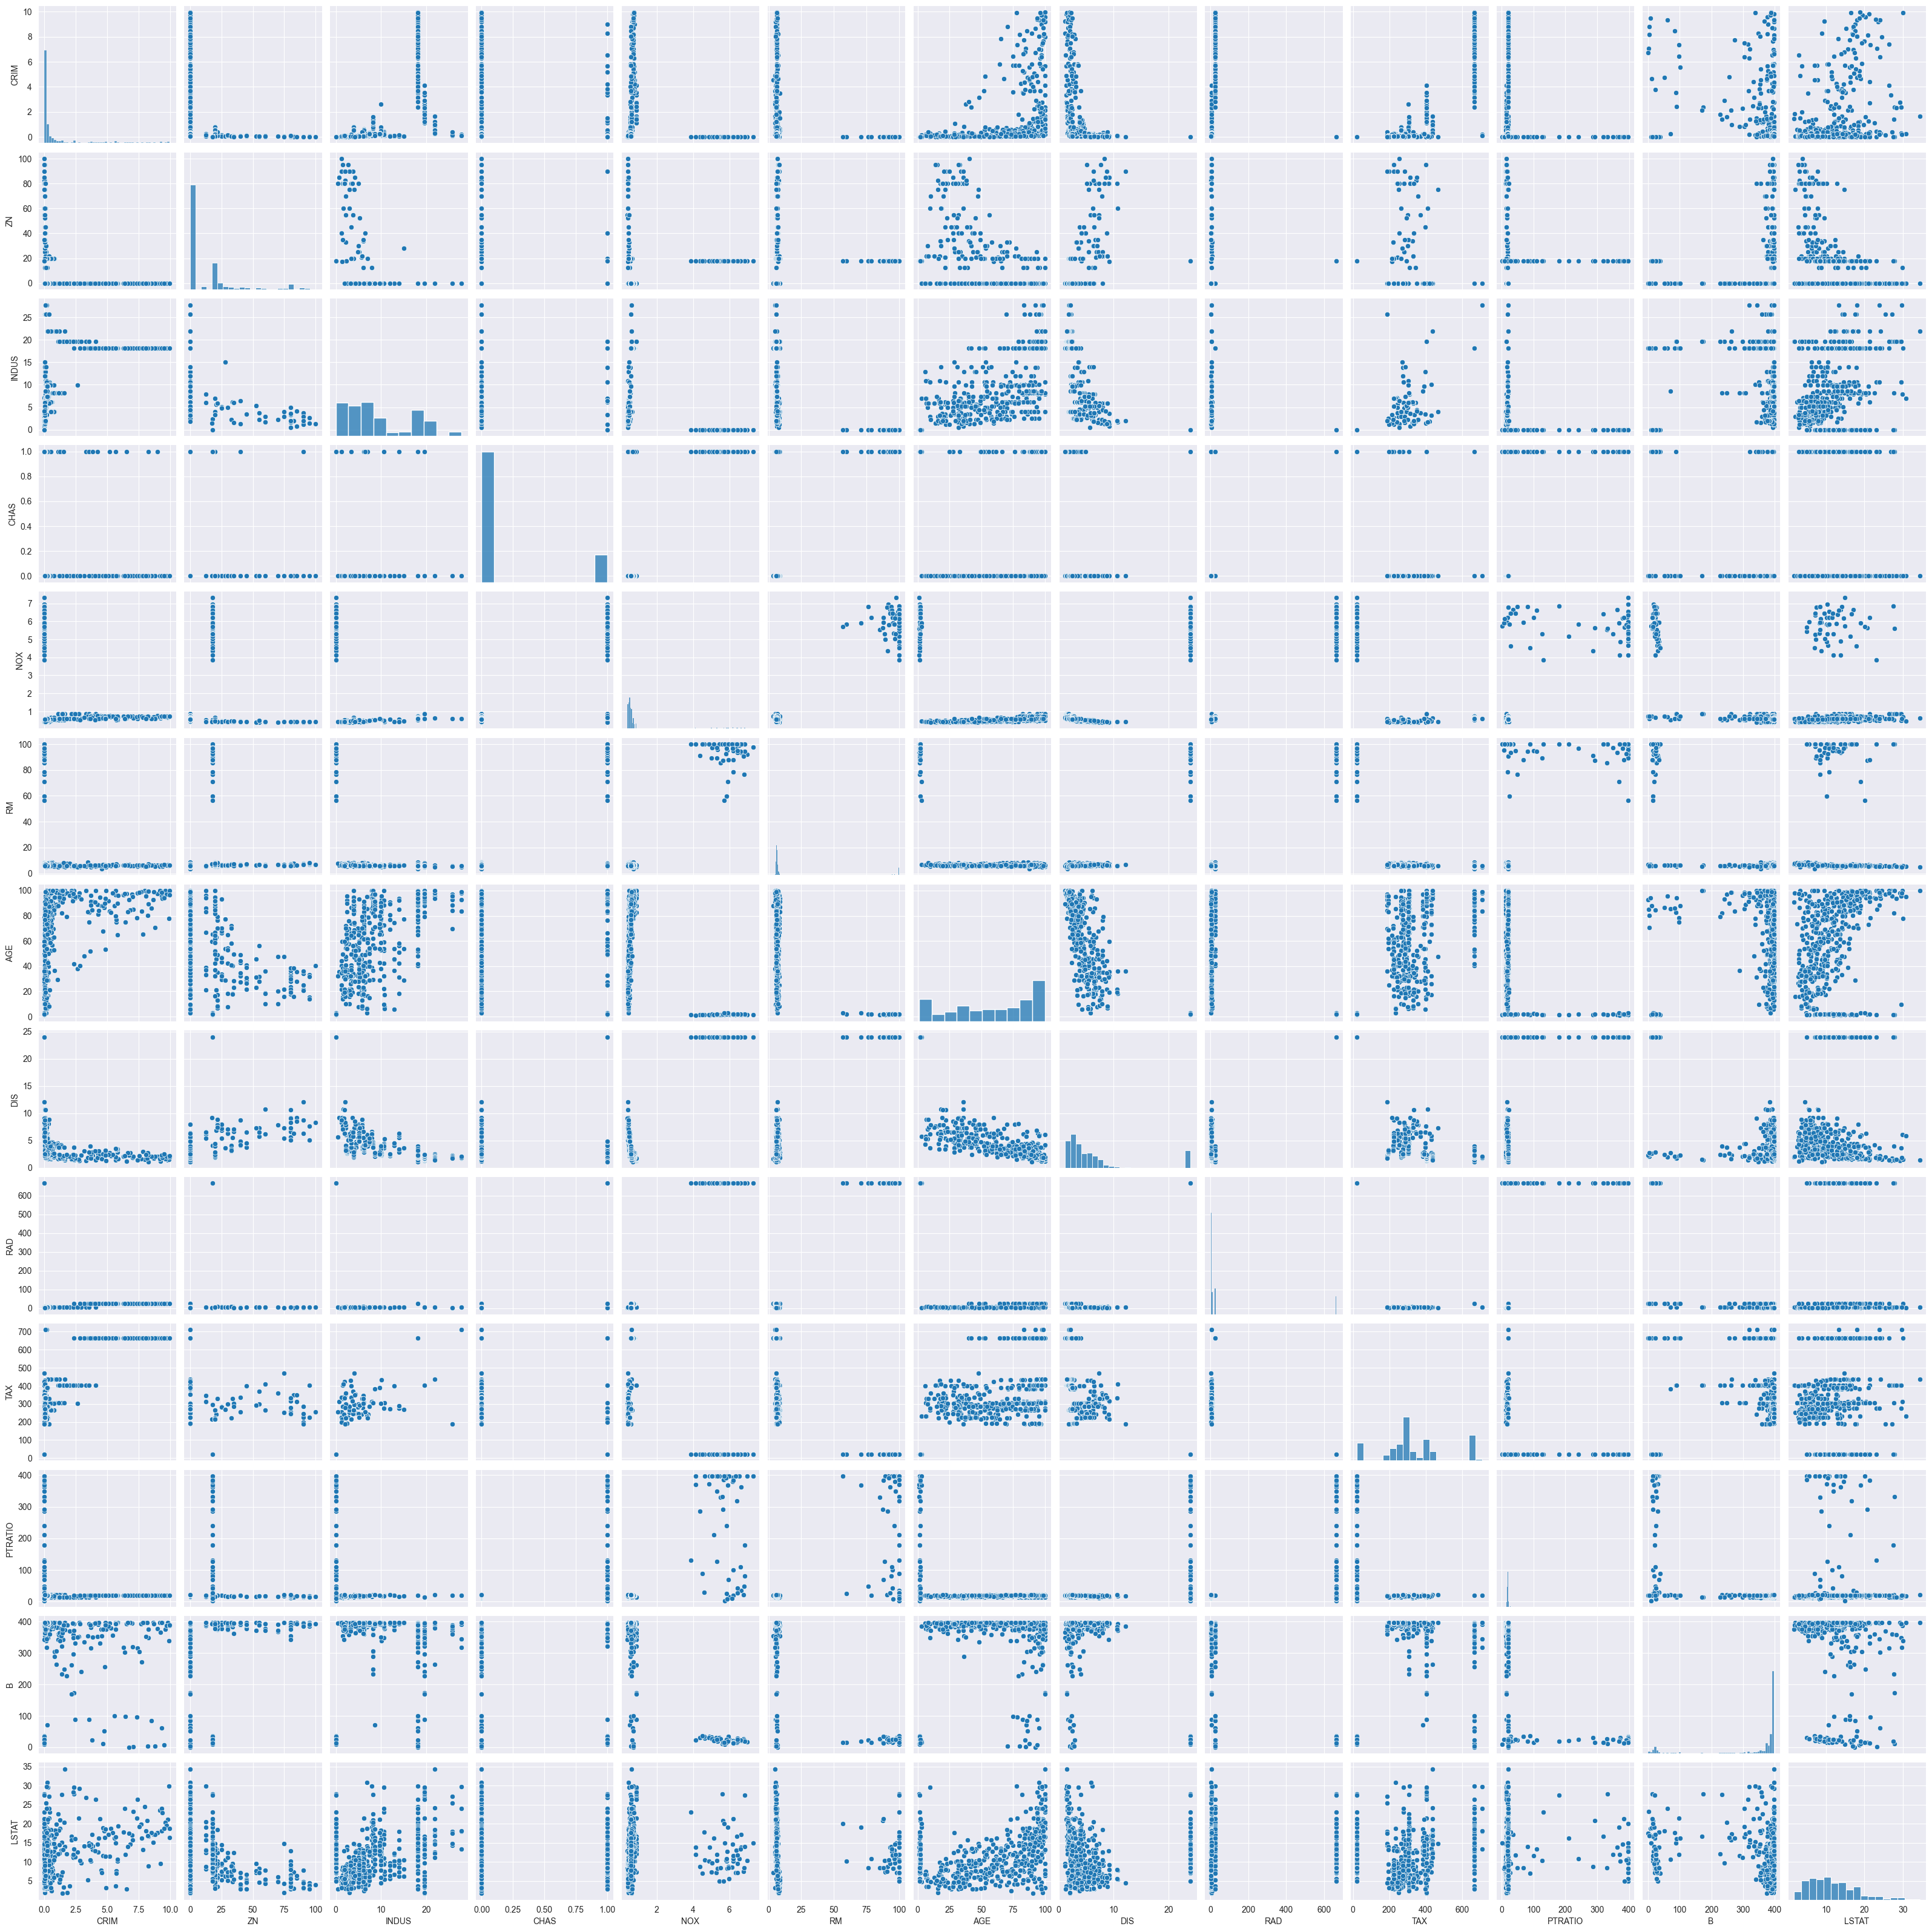

In [296]:
# Define features and target variable
features = df.drop('MEDV', axis=1)

print("\n-------------------------------------------------------     Pairplot     ------------------------------------------------------\n")
# Create a pairplot
sns.pairplot(features)
plt.show()


## Part 2: Preprocessing

#### 7. Handling Missing Values

Mean/Median/Mode Imputation:

This method involves replacing missing values in numerical variables with the mean (or median) of the respective column and in categorical variables with the mode (most frequent value). It's commonly used for its simplicity and effectiveness in handling random missingness, especially when the missingness mechanism is not expected to bias the results significantly.

In [297]:
# Load data from Excel file
df = pd.read_excel('DataSet.xlsx')

# Number of missing values before imputation
print("Number of missing values before imputation:")
print(df.isnull().sum().sum())

# Mean Imputation for 'MEDV', 'B', and 'DIS' columns
df['MEDV'].fillna(df['MEDV'].mean(), inplace=True)
df['B'].fillna(df['B'].mean(), inplace=True)
df['DIS'].fillna(df['DIS'].mean(), inplace=True)

# Mode Imputation for 'CHAS' column
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)

# Number of missing values after imputation
print("Number of missing values after imputation:")
print(df.isnull().sum().sum())

# Save the filled DataFrame to a new Excel file
df.to_excel('DataSet_1_filled.xlsx', index=False)


Number of missing values before imputation:
127
Number of missing values after imputation:
0


Forward Fill (ffill) or Backward Fill (bfill):

These methods fill missing values by propagating the last observed non-missing value forward (ffill) or backward (bfill). They are suitable for time series or ordered data where missing values occur due to a natural progression or sequence, maintaining the temporal structure of the data.

In [298]:
# Load data from Excel file
df = pd.read_excel('DataSet.xlsx')

# Number of missing values before fill
print("Number of missing values before fill:")
print(df.isnull().sum().sum())

# Forward Fill
df.fillna(method='ffill', inplace=True)
# Backward Fill
# df.fillna(method='bfill', inplace=True)

# Number of missing values after fill
print("Number of missing values after fill:")
print(df.isnull().sum().sum())

# Save the filled DataFrame to a new Excel file
# df.to_excel('DataSet_1_filled.xlsx', index=False)


Number of missing values before fill:
127
Number of missing values after fill:
0


Imputation using Machine Learning Models:

In this approach, missing values are imputed using machine learning models trained on the dataset. Models like Random Forest or k-Nearest Neighbors learn patterns in the data and predict missing values based on other features. It's effective for handling complex missingness mechanisms and can provide accurate imputations by capturing non-linear relationships and interactions between variables. However, it's computationally more intensive compared to traditional methods.

In [299]:
# Load data from Excel file
df = pd.read_excel('DataSet.xlsx')

# Number of missing values before imputation
print("Number of missing values before imputation:")
print(df.isnull().sum().sum())

# Imputation using IterativeImputer with RandomForestRegressor
# Initialize IterativeImputer with a machine learning model (Random Forest)
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Fit imputer to data and transform the dataset
imputed_data = imputer.fit_transform(df)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

# Number of missing values after imputation
print("Number of missing values after imputation:")
print(df_imputed.isnull().sum().sum())

# Save the filled DataFrame to a new Excel file
# df_imputed.to_excel('DataSet_1_filled.xlsx', index=False)


Number of missing values before imputation:
127
Number of missing values after imputation:
0


#### 8. Removing Features

Removing columns (features) is a common preprocessing step in machine learning and data analysis, aimed at improving model performance, reducing overfitting, and simplifying the model.

Reasons for Removing Columns:

High Missing Value Ratio:
    Explanation: If a column has a high percentage of missing values, imputing these values might introduce bias or noise.
    Strategy: Set a threshold (e.g., if more than 60% of the values are missing, remove the column).

Low Variance:
    Explanation: Features with little to no variance (e.g., almost all values are the same) provide little to no information for the model.
    Strategy: Remove columns with variance below a certain threshold.

High Correlation:
    Explanation: Highly correlated features can introduce multicollinearity, leading to redundancy and affecting the model's performance.
    Strategy: Identify and remove one of the correlated pairs of features using a correlation matrix.

Irrelevant or Redundant Features:
    Explanation: Some features might not be relevant to the target variable or might be redundant due to the presence of other features.
    Strategy: Use domain knowledge or feature importance metrics from models to identify and remove these features.

Feature Selection Methods:
    Explanation: Statistical and algorithmic methods can identify the most important features for the model.
    Strategy: Use techniques like Recursive Feature Elimination (RFE), Lasso Regression, or tree-based feature importance to select features.


-----------------------------------------------     Correlation Matrix     -----------------------------------------------


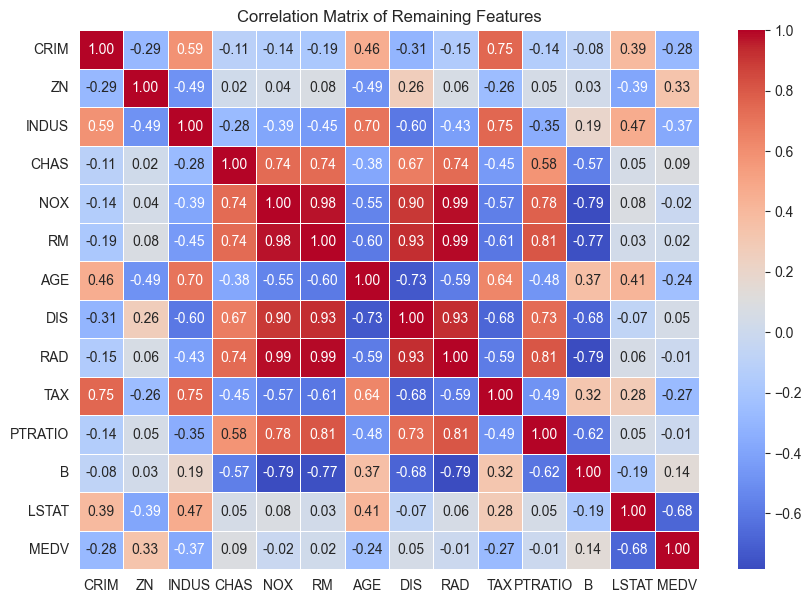


---------------------------------------     Sorted Absolute Correlations with MEDV     -----------------------------------

MEDV       1.00
LSTAT      0.68
INDUS      0.37
ZN         0.33
CRIM       0.28
TAX        0.27
AGE        0.24
B          0.14
CHAS       0.09
DIS        0.05
NOX        0.02
RM         0.02
PTRATIO    0.01
RAD        0.01
Name: MEDV, dtype: float64

-------------------------------------------------     Removed Columns     ------------------------------------------------

Removed columns due to high missing value ratio: []
Removed columns due to low variance: []
Removed columns due to high correlation: ['RM', 'NOX', 'RAD']
Removed columns due to low correlation with MEDV: ['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO']

All Removed columns: ['NOX', 'CHAS', 'PTRATIO', 'DIS', 'RAD', 'RM']

-----------------------------------------------     Correlation Matrix     -----------------------------------------------


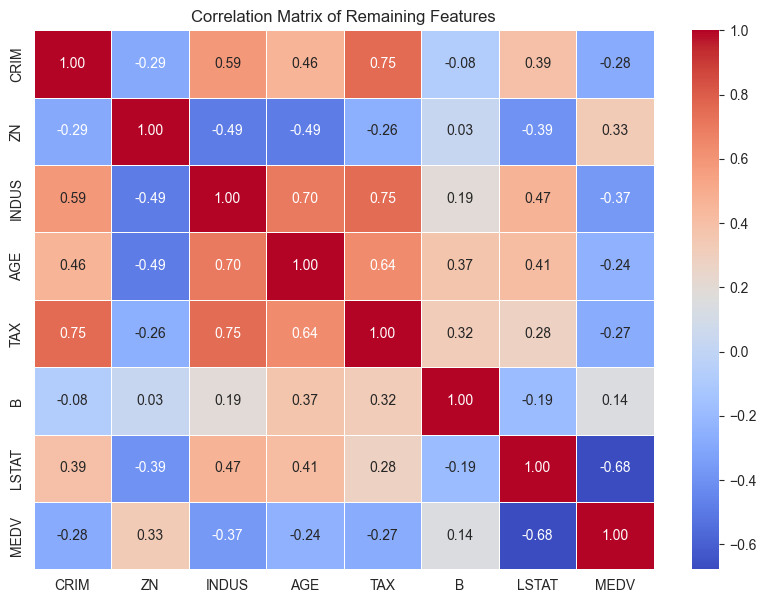

In [300]:
# Load data from Excel file
df = pd.read_excel('DataSet_1_filled.xlsx')

# Generate and plot the correlation matrix
print("\n-----------------------------------------------     Correlation Matrix     -----------------------------------------------\n")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Remaining Features')
plt.show()

# Calculate the absolute correlations with the target feature (MEDV)
correlations_with_target = correlation_matrix['MEDV'].abs()

# Sort the absolute correlations with the target feature
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Print the sorted correlations
print("\n---------------------------------------     Sorted Absolute Correlations with MEDV     -----------------------------------\n")
print(sorted_correlations.round(2))

# Remove columns with high missing value ratio
missing_threshold = 0.6
missing_ratio = df.isnull().sum() / len(df)
columns_to_remove_missing_ratio = missing_ratio[missing_ratio > missing_threshold].index

print("\n-------------------------------------------------     Removed Columns     ------------------------------------------------\n")
print(f"Removed columns due to high missing value ratio: {list(columns_to_remove_missing_ratio)}")

# Remove columns with low variance
variance_threshold = 0.01  # Example threshold; adjust as needed
var_thresh = VarianceThreshold(threshold=variance_threshold)
var_thresh.fit(df.fillna(0))  # Fill NaNs temporarily to compute variance
columns_to_remove_low_variance = df.columns[var_thresh.get_support() == False]

print(f"Removed columns due to low variance: {list(columns_to_remove_low_variance)}")

# Compute the correlation matrix
correlation_matrix = df.corr().abs()

# Compute the correlation of each feature with the target feature (MEDV)
correlations_with_target = correlation_matrix['MEDV']

# Remove highly correlated columns
correlation_threshold = 0.9
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_remove_high_correlation = set()

for column in upper_tri.columns:
    high_corr_columns = upper_tri.index[upper_tri[column] > correlation_threshold].tolist()
    for high_corr_column in high_corr_columns:
        if column != high_corr_column and high_corr_column not in columns_to_remove_high_correlation:
            if correlations_with_target[column] > correlations_with_target[high_corr_column]:
                columns_to_remove_high_correlation.add(high_corr_column)
            else:
                columns_to_remove_high_correlation.add(column)
                
print(f"Removed columns due to high correlation: {list(columns_to_remove_high_correlation)}")

# Remove columns with low correlation with the target (MEDV)
low_correlation_threshold = 0.1
columns_to_remove_low_target_correlation = correlations_with_target[correlations_with_target < low_correlation_threshold].index

print(f"Removed columns due to low correlation with MEDV: {list(columns_to_remove_low_target_correlation)}")

# Merge all columns to remove
columns_to_remove = set(columns_to_remove_missing_ratio).union(columns_to_remove_low_variance).union(columns_to_remove_high_correlation).union(columns_to_remove_low_target_correlation)

print(f"\nAll Removed columns: {list(columns_to_remove)}")

# Drop all columns to remove
df.drop(columns=columns_to_remove, inplace=True)

# Generate and plot the correlation matrix
print("\n-----------------------------------------------     Correlation Matrix     -----------------------------------------------\n")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Remaining Features')
plt.show()

# Save the modified DataFrame to a new Excel file
df.to_excel('DataSet_2_dropped.xlsx', index=False)


#### 9. Numerical & Categorical Features

Numerical Features:

Numerical features, also known as quantitative features, represent measurable quantities and can take on a wide range of numeric values. They can be either discrete (countable, e.g., number of rooms) or continuous (measurable, e.g., temperature). These features are used in mathematical calculations and statistical analysis. Machine learning models often require these features to be standardized or normalized.

Categorical Features:

Categorical features, also known as qualitative features, represent categories or groups. These values describe qualities or characteristics and are often represented as strings or integers. They can be either nominal (categories without any inherent order, e.g., color or gender) or ordinal (categories with a meaningful order or ranking, e.g., education level). These features are often encoded (e.g., one-hot encoding, label encoding) to be used in machine learning models. They are useful for grouping and segmenting data.

In [301]:
# Load data from Excel file
df = pd.read_excel('DataSet.xlsx')

# Identify numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Identify categorical features
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

# Identify potential categorical features based on unique values
potential_categorical_features = [col for col in df.columns if df[col].nunique() < 20]

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Potential Categorical Features (based on unique values):", potential_categorical_features)


Numerical Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Categorical Features: []
Potential Categorical Features (based on unique values): ['CHAS', 'RAD']


#### 10. Normalizing & Standardizing

Normalization and standardization are techniques used to rescale numerical features to ensure that they contribute equally to the analysis and machine learning models. These techniques help improve the performance and training stability of the models by ensuring that numerical features have similar scales.

Normalization:

Normalization (also known as min-max scaling) rescales the feature values to a range of [0, 1] or [-1, 1].
It is particularly useful when you know that the data has no outliers and follows a known distribution.

Standardization:

Standardization (also known as z-score normalization) rescales the feature values so that they have a mean of 0 and a standard deviation of 1.
It is useful when the data has outliers or follows a Gaussian (normal) distribution.

Differences:

Normalization scales features to a fixed range, while standardization centers features around 0 with a standard deviation of 1.
Normalization is sensitive to outliers since it depends on the min and max values, whereas standardization is less affected by outliers because it uses the mean and standard deviation.

Do We Need to Execute These Methods on Our Data?

Yes, our dataset contains numerical features that vary widely in scale, so normalization or standardization can help improve the performance of machine learning models, especially those that are sensitive to the scale of the input data (e.g., KNN, SVM, NN).

We will execute standardization on our dataset because it is particularly useful for linear regression and some other models, since it can help achieve faster convergence and better model interpretability.

In [302]:
# Load data from Excel file
df = pd.read_excel('DataSet_2_dropped.xlsx')

# Identify numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Separate numerical features from the dataframe
numerical_data = df[numerical_features]

print("\n-------------------------------------------------     Normalized Data     ------------------------------------------------\n")
# Normalize the numerical features
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numerical_data)
df_normalized = pd.DataFrame(normalized_data, columns=numerical_features)

# Calculate the mean, standard deviation, minimum, median and maximum of each feature after normalization
df_mean_normalized = df_normalized.mean(axis=0)
df_std_dev_normalized = df_normalized.std(axis=0)
df_min_values_normalized = df_normalized.min(axis=0)
df_median_values_normalized = np.median(df_normalized, axis=0)
df_max_values_normalized = df_normalized.max(axis=0)

# Create a DataFrame to display the statistics after normalization
df_normalized_stats = pd.DataFrame({
    'Mean': df_mean_normalized,
    'Std Dev': df_std_dev_normalized,
    'Minimum': df_min_values_normalized,
    'Median': df_median_values_normalized,
    'Maximum': df_max_values_normalized
})

# Display the DataFrame
print(df_normalized_stats)

print("\n------------------------------------------------     Standardized Data     -----------------------------------------------\n")
# Standardize the numerical features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)
df_standardized = pd.DataFrame(standardized_data, columns=numerical_features)

# Calculate the mean, standard deviation, minimum, median and maximum of each feature after standardization
df_mean_standardized = df_standardized.mean(axis=0)
df_std_dev_standardized = df_standardized.std(axis=0)
df_min_values_standardized = df_standardized.min(axis=0)
df_median_values_standardized = np.median(df_standardized, axis=0)
df_max_values_standardized = df_standardized.max(axis=0)

# Create a DataFrame to display the statistics after standardization
df_standardized_stats = pd.DataFrame({
    'Mean': df_mean_standardized,
    'Std Dev': df_std_dev_standardized,
    'Minimum': df_min_values_standardized,
    'Median': df_median_values_standardized,
    'Maximum': df_max_values_standardized
})

# Display the DataFrame
print(df_standardized_stats)

# Save the standardized DataFrame to a new Excel file
df_standardized.to_excel('DataSet_3_standard.xlsx', index=False)



-------------------------------------------------     Normalized Data     ------------------------------------------------

           Mean   Std Dev  Minimum    Median  Maximum
CRIM   0.127346  0.240726      0.0  0.014514      1.0
ZN     0.132953  0.230487      0.0  0.000000      1.0
INDUS  0.331837  0.258458      0.0  0.250901      1.0
AGE    0.582702  0.334848      0.0  0.648503      1.0
TAX    0.461954  0.261537      0.0  0.415171      1.0
B      0.848507  0.299437      0.0  0.983635      1.0
LSTAT  0.300116  0.185585      0.0  0.264688      1.0
MEDV   0.399324  0.190488      0.0  0.376430      1.0

------------------------------------------------     Standardized Data     -----------------------------------------------

               Mean  Std Dev   Minimum    Median   Maximum
CRIM   5.616939e-17  1.00099 -0.529530 -0.469177  3.628679
ZN     1.404235e-17  1.00099 -0.577404 -0.577404  3.765529
INDUS  2.246775e-16  1.00099 -1.285180 -0.313458  2.587747
AGE    0.000000e+00  1.00099

#### 11. Preprocessing Categorical Features

One-Hot Encoding:
    Convert categorical variables into binary vectors where each category becomes a new binary feature. This method is suitable when the categorical variable doesn't have a natural order.

Label Encoding:
    Encode categorical labels with numerical values. This method assigns a unique integer to each category. It is suitable for ordinal categorical variables where there is an inherent order.

Ordinal Encoding:
    Similar to label encoding, but the integers assigned to categories follow a specific order. It is suitable for ordinal categorical variables with a clear order.

Dummy Encoding:
    Similar to one-hot encoding, but drops one category to avoid multicollinearity. This is useful when dealing with categorical variables with many levels to prevent the curse of dimensionality.

Frequency Encoding:
    Encode categorical labels with the frequency of each category in the dataset. This method replaces categories with their occurrence frequency, which can be beneficial if frequency correlates with the target variable.

Target Encoding (Mean Encoding):
    Encode categorical labels with the mean of the target variable for each category. This method replaces categories with the average target value corresponding to each category, which can capture the relationship between the categorical variable and the target variable.

Binary Encoding:
    Encode categorical labels as binary strings, then split the strings into separate columns. This method is useful for nominal categorical variables with high cardinality.

Hashing Encoding:
    Convert categorical variables into a fixed-length numerical vector using hash functions. This method reduces the dimensionality of high cardinality categorical variables.

#### 12. Train, Test, Validation Data

Test, train, and validation data are subsets of the dataset used for different stages of model development and evaluation:

Training subset is used to train the machine learning model. It comprises the majority of the dataset and is utilized by the model to learn patterns and relationships between input features and the target variable.

Validation subset is used to fine-tune the model and select the best hyperparameters. It helps assess the model's performance on unseen data during training and prevents overfitting by providing feedback to adjust the model's parameters.

Test subset is used to evaluate the final performance of the trained model. It serves as an independent dataset that the model has never seen before, allowing an unbiased assessment of its generalization ability.

Common division methods for splitting the data into these subsets include:

Train-Test Split:
    The dataset is divided into a training set and a test set. The model is trained on the training set and evaluated on the test set. This method provides a simple evaluation of model performance but may not capture the variability of model performance across different subsets of data.

Train-Validation-Test Split:
    The dataset is divided into three subsets: training, validation, and test sets. The model is trained on the training set, validated on the validation set to tune hyperparameters, and finally evaluated on the test set to assess its generalization performance.

K-Fold Cross-Validation:
    The dataset is divided into K equal-sized folds. The model is trained K times, each time using K-1 folds as training data and the remaining fold as validation data. The final performance is averaged over all folds. This method provides a more robust estimation of model performance and reduces the variability in evaluation metrics.
    
We will divide our data into training, validation, and test sets using a train-validation-test split method. We'll use an 80-10-10 split ratio.

In [303]:
# Load data from Excel file
df = pd.read_excel('DataSet_3_standard.xlsx')

# Define features (X) and target variable (y)
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split data into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=28)

# Further split temp data into validation (50%) and test (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=28)

# Display the sizes of each subset
print("Train set size:", X_train.shape[0])
print("Validation set size:", X_validation.shape[0])
print("Test set size:", X_test.shape[0])


Train set size: 404
Validation set size: 51
Test set size: 51


#### 13. Other Preprocessing Methods

Feature Engineering:
    Creating new features based on existing ones can enhance the model's ability to capture complex relationships in the data. Feature engineering involves generating informative features that are relevant to the problem domain.

Feature Transformation:
    Transforming features can help capture complex relationships in the data. Polynomial transformation, logarithmic transformation, and box-cox transformation are examples of feature transformation techniques.

Dimensionality Reduction:
    Reducing the number of features can simplify model training and decrease computational complexity. Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Linear Discriminant Analysis (LDA) are common dimensionality reduction techniques.

Outlier Detection and Removal:
    Outliers can significantly affect model performance. Identifying and removing outliers using statistical methods or robust algorithms helps improve model robustness.

Data Imbalance Handling:
    In datasets where the distribution of target classes is imbalanced, techniques such as oversampling, undersampling, or generating synthetic samples (e.g., SMOTE) can address class imbalance and prevent bias in model training.

## Part 3: Training & Evaluation

### Phase 1: Linear Regression

#### 14. Supervised, Unsupervised, Semi-supervised, Reinforcement Learning

Supervised Machine Learning:

Supervised learning involves training a model on labeled data, where the input features are mapped to corresponding target labels. The goal is to learn a mapping function from input to output.
Example: In a spam email classification task, the input features could be email content and metadata, and the target labels would indicate whether the email is spam or not.

Unsupervised Learning:

Unsupervised learning involves training a model on unlabeled data, where the algorithm tries to find hidden patterns or structures in the data without explicit guidance.
Example: Clustering algorithms like K-means can group similar data points together without any prior knowledge of the groups.

Semi-supervised Learning:

Semi-supervised learning combines elements of both supervised and unsupervised learning. It leverages a small amount of labeled data along with a larger pool of unlabeled data to train the model.
Example: In medical image analysis, where labeling data is expensive and time-consuming, semi-supervised learning can use a small set of labeled images along with a larger set of unlabeled images to improve model performance.

Reinforcement Learning:

Reinforcement learning involves training an agent to interact with an environment and learn optimal actions through trial and error. The agent receives feedback in the form of rewards or penalties based on its actions.
Example: Training an AI agent to play chess, where the agent learns to make optimal moves by receiving rewards (winning) or penalties (losing) based on its actions.

Differences:

Supervised learning relies on labeled data for training, whereas unsupervised learning operates on unlabeled data. Semi-supervised learning utilizes both labeled and unlabeled data, and reinforcement learning learns from feedback received from the environment.

In supervised learning, the model learns to predict output labels directly from input features, while unsupervised learning discovers hidden patterns or structures in the data. Semi-supervised learning leverages labeled data to improve model performance, and reinforcement learning learns optimal actions through interaction with the environment.

#### 15. Regression

Regression and classification are two fundamental tasks in supervised machine learning, but they have distinct objectives and outputs:

Regression is a supervised learning task where the goal is to predict a continuous target variable based on input features.
The output of a regression model is a continuous numerical value, representing a quantity or a real-valued number.
Regression models are used when the target variable is continuous and ordered, such as predicting house prices, stock prices, or temperature.

Classification is also a supervised learning task, but the goal is to predict a categorical target variable or label based on input features.
The output of a classification model is a discrete class label, representing a category or a class membership.
    Classification models are used when the target variable is categorical, such as classifying emails as spam or ham, predicting whether a patient has a disease or not, or identifying handwritten digits.

Differences:

Output Type:
    Regression models predict continuous numerical values, while classification models predict discrete class labels.

Nature of Target Variable:
    In regression, the target variable is continuous and ordered, allowing for a wide range of possible values.
    In classification, the target variable is categorical and unordered, typically representing distinct classes or categories.

Evaluation Metrics:
    Regression models are evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or Mean Absolute Error (MAE), which quantify the difference between predicted and actual values.
    Classification models are evaluated using metrics such as Accuracy, Precision, Recall, F1-score, or Area Under the Receiver Operating Characteristic Curve (ROC AUC), which measure the model's performance in correctly classifying instances into different classes.

Model Types:
    Regression models include Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, etc., which predict continuous outcomes.
    Classification models include Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Neural Networks, etc., which predict categorical outcomes.

#### 16. Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that there is a linear relationship between the independent variables (features) and the dependent variable (target). It means that the relationship can be represented by a straight line.

Simple Linear Regression:

In simple linear regression, there is only one independent variable (feature) used to predict the dependent variable (target). The relationship between the two variables is described by the equation of a straight line:
$$ y = \alpha x + \beta $$
where $ y $ is the dependent variable, $ x $ is the independent variable, $ \alpha $ is the slope of the line (which represents the change in $ y $ for a unit change in $ x $), and $\beta$ is the y-intercept (the value of $ y $ when $ x=0 $).

Residual Sum of Squares (RSS) is a measure that quantifies the difference between the observed values of the dependent variable (target) and the values predicted by the linear regression model. Here's how RSS is computed and how derivatives of the RSS function are used to find the desired parameters:

RSS measures the sum of the squared differences between the observed values ($ y_i $) and the predicted values ($ \hat{y_i} $) of the dependent variable (target) for each data point $ i $:
$$ RSS = \Sigma (y_i - \hat{y_i} )^2  = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

To find the parameters ($ \alpha $ and $ \beta $) that minimize the Residual Sum of Squares (RSS) in simple linear regression, we compute the derivatives of the RSS function with respect to $ \alpha $ (slope) and $ \beta $ (intercept). To find the optimal values of $ \alpha $ and $ \beta $, we set the derivatives of RSS to 0 and solve the resulting equations. These equations yield the optimal values of $ \alpha $ and $ \beta $ that minimize the RSS, providing the best-fit line for the data that minimizes the difference between the observed and predicted values in simple linear regression.

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$

Based on the above formula, implement the function below to compute the parameters of a simple linear regression

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:



In [304]:
# Simple Linear Regression model from scratch
class LinearRegression:
    def __init__(self):
        self.intercept = None
        self.slope = None

    def fit(self, input, output):
        """
        Fits the linear regression model to the input-output data.
        
        Parameters:
        input (array-like): The input features.
        output (array-like): The output target values.
        """
        x_mean = np.mean(input)
        y_mean = np.mean(output)

        x_diff = input - x_mean
        y_diff = output - y_mean

        self.slope = np.sum(x_diff * y_diff) / np.sum(x_diff ** 2)
        self.intercept = y_mean - self.slope * x_mean

    def predict(self, input):
        """
        Predicts the output values for given input features.

        Parameters:
        input (array-like): The input features.

        Returns:
        array-like: Predicted output values.
        """
        if self.intercept is None or self.slope is None:
            raise ValueError("Model has not been trained yet. Please call fit() method first.")

        return [self.intercept + self.slope * x for x in input]

    @staticmethod
    def root_mean_square_error(predicted_values, actual_values):
        """
        Computes the Root Mean Square Error (RMSE) between predicted and actual values.

        Parameters:
        predicted_values (array-like): Predicted output values.
        actual_values (array-like): Actual output values.

        Returns:
        float: Root Mean Square Error (RMSE).
        """
        return np.sqrt(np.mean((predicted_values - actual_values) ** 2))

    @staticmethod
    def r2_score(predicted_values, actual_values):
        """
        Computes the R-squared score between predicted and actual values.

        Parameters:
        predicted_values (array-like): Predicted output values.
        actual_values (array-like): Actual output values.

        Returns:
        float: R-squared score.
        """
        mean_actual = np.mean(actual_values)
        rss = np.sum((actual_values - predicted_values) ** 2)
        tss = np.sum((actual_values - mean_actual) ** 2)
        return 1 - (rss / tss)


#### 17. Best Feature for Prediction

In linear regression, the strength of the relationship between the feature (independent variable) and the target variable (dependent variable) is crucial. One way to measure this relationship is through the correlation coefficient. A higher absolute correlation value is more likely to indicate a stronger linear relationship with the target variable, making it a potentially better predictor for the linear regression model. By selecting the feature with the highest correlation to the target variable, we can expect our model to perform better in terms of prediction accuracy.

In [305]:
# Read data from Excel file
df = pd.read_excel('DataSet_3_standard.xlsx')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate the absolute correlations with the target feature (MEDV)
correlations_with_target = correlation_matrix['MEDV'].abs()

# Sort the absolute correlations with the target feature and find the best feature
best_feature = correlations_with_target.drop('MEDV').idxmax()
best_correlation = correlations_with_target[best_feature]

print(f"The feature with the highest correlation to MEDV is '{best_feature}' with a correlation of {best_correlation:.2f}")


The feature with the highest correlation to MEDV is 'LSTAT' with a correlation of 0.68


#### 18. RSS, MSE, RMSE, R2 score

Residual Sum of Squares (RSS)

RSS is a measure of the discrepancy between the data and the model. It is the sum of the squares of the residuals, where a residual is the difference between an observed value and the value predicted by the model. Mathematically, it is represented as:
$ RSS = \Sigma (y_i - \hat{y_i} )^2 $
where $ y_i $ is the actual value and $ \hat{y_i} $ is the predicted value.
A lower RSS indicates a better fit of the model to the data.

Mean Squared Error (MSE)

MSE is the average of the squared differences between the actual and predicted values. It is calculated as:
$ MSE = \frac{1}{n} \Sigma (y_i - \hat{y_i} )^2 $
MSE penalizes larger errors more severely than smaller ones due to the squaring of residuals. It provides a general sense of how well the model predicts the data.
A lower MSE indicates a better fit of the model to the data.

Root Mean Squared Error (RMSE)
RMSE is the square root of the MSE, which brings the units back to the original scale of the target variable. It is calculated as:
$ RMSE = \sqrt{MSE} $
RMSE is more interpretable than MSE because it is in the same units as the target variable. It is commonly used to compare the performance of different models.
A lower RMSE indicates a better fit of the model to the data.

R-squared (R²) Score

The R² score, also known as the coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It is calculated as:
$ R^2 = 1 − \frac{RSS}{TSS} $
where $ TSS $ (Total Sum of Squares) is the total variance in the data:
$ TSS = \Sigma (y_i - \bar{y_i} )^2 $
with $ \bar{y} $ being the mean of the actual values. An $ R^2 $ value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variance in the target variable.

In [306]:
# Read data from Excel file
df = pd.read_excel('DataSet_3_standard.xlsx')

# Extract features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# List of designated features
designated_feature_list = X.columns

# Results dictionary to store slope, intercept, RMSE, and R-squared for each feature
results = {'Feature': [], 'Slope': [], 'Intercept': [], 'RMSE': [], 'R-squared': []}

# Predictions dictionary to store actual and predicted values for each feature
predictions = {}

# Iterate over designated features
for feature in designated_feature_list:
    # Extract feature data
    X_feature = X[feature].values
    
    # Split data into train (80%) and temp (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X_feature, y, test_size=0.2, random_state=28)
    
    # Further split temp data into validation (50%) and test (50%)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=28)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE and R-squared
    rmse = LinearRegression.root_mean_square_error(y_pred, y_test)
    r2 = LinearRegression.r2_score(y_pred, y_test)
    
    # Append results to dictionary
    results['Feature'].append(feature)
    results['Slope'].append(model.slope)
    results['Intercept'].append(model.intercept)
    results['RMSE'].append(rmse)
    results['R-squared'].append(r2)
    
    # Store actual and predicted values for plotting
    predictions[feature] = (y_test, y_pred)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort results_df by R-squared in descending order
results_df = results_df.sort_values(by='R-squared', ascending=False)

# Print sorted results_df
print(results_df)


  Feature     Slope  Intercept      RMSE  R-squared
6   LSTAT -0.706693   0.014513  0.714538   0.394156
1      ZN  0.336632   0.019976  0.857354   0.127771
2   INDUS -0.393802   0.022537  0.874368   0.092809
3     AGE -0.254786   0.026704  0.884799   0.071036
5       B  0.155693   0.026676  0.912308   0.012373
4     TAX -0.313411   0.027073  0.920930  -0.006382
0    CRIM -0.322943   0.026137  0.960117  -0.093852


#### 19. Analysis

CRIM (Crime rate per capita): The negative slope indicates that an increase in the crime rate is associated with a decrease in the MEDV. The high RMSE and negative R-squared suggest that this model performs poorly, possibly worse than a horizontal line at the mean value of MEDV.

ZN (Proportion of residential land zoned for large lots): The positive slope indicates that a higher proportion of land zoned for large lots is associated with a higher MEDV. The RMSE is slightly better, and the positive R-squared suggests that this feature has some predictive power, although still relatively low.

INDUS (Proportion of non-retail business acres per town): A negative slope indicates that an increase in industrial business areas is associated with a decrease in MEDV. The RMSE and positive but low R-squared indicate a small predictive power.

AGE (Proportion of owner-occupied units built prior to 1940): The negative slope suggests older homes are associated with lower MEDV. The RMSE and low R-squared again indicate limited predictive power.

TAX (Full-value property tax rate per $10,000): The negative slope suggests higher taxes are associated with lower MEDV. The high RMSE and near-zero R-squared indicate that this model does not explain the variance in MEDV well.

B (Proportion of black residents by town): The positive slope suggests a higher proportion of black residents is associated with a higher MEDV. However, the RMSE and very low R-squared indicate weak predictive power.

LSTAT (Percentage of lower status of the population): The negative slope indicates that a higher percentage of lower-status population is associated with a lower MEDV. The RMSE is the lowest among all features, and the R-squared is the highest, suggesting that LSTAT is the most predictive feature for MEDV.

LSTAT shows the strongest relationship with MEDV, having the lowest RMSE and highest R-squared, indicating it is the best single predictor among the features tested.
Other features like ZN and INDUS show some predictive power but are not as strong as LSTAT.
Features such as CRIM, TAX, and B show weak or negative predictive power, indicated by high RMSE and low or negative R-squared values.

Overall, as predicted LSTAT stands out as the most valuable feature for predicting MEDV based on this simple linear regression analysis.

#### 20. Actual Values vs. Prediction Values

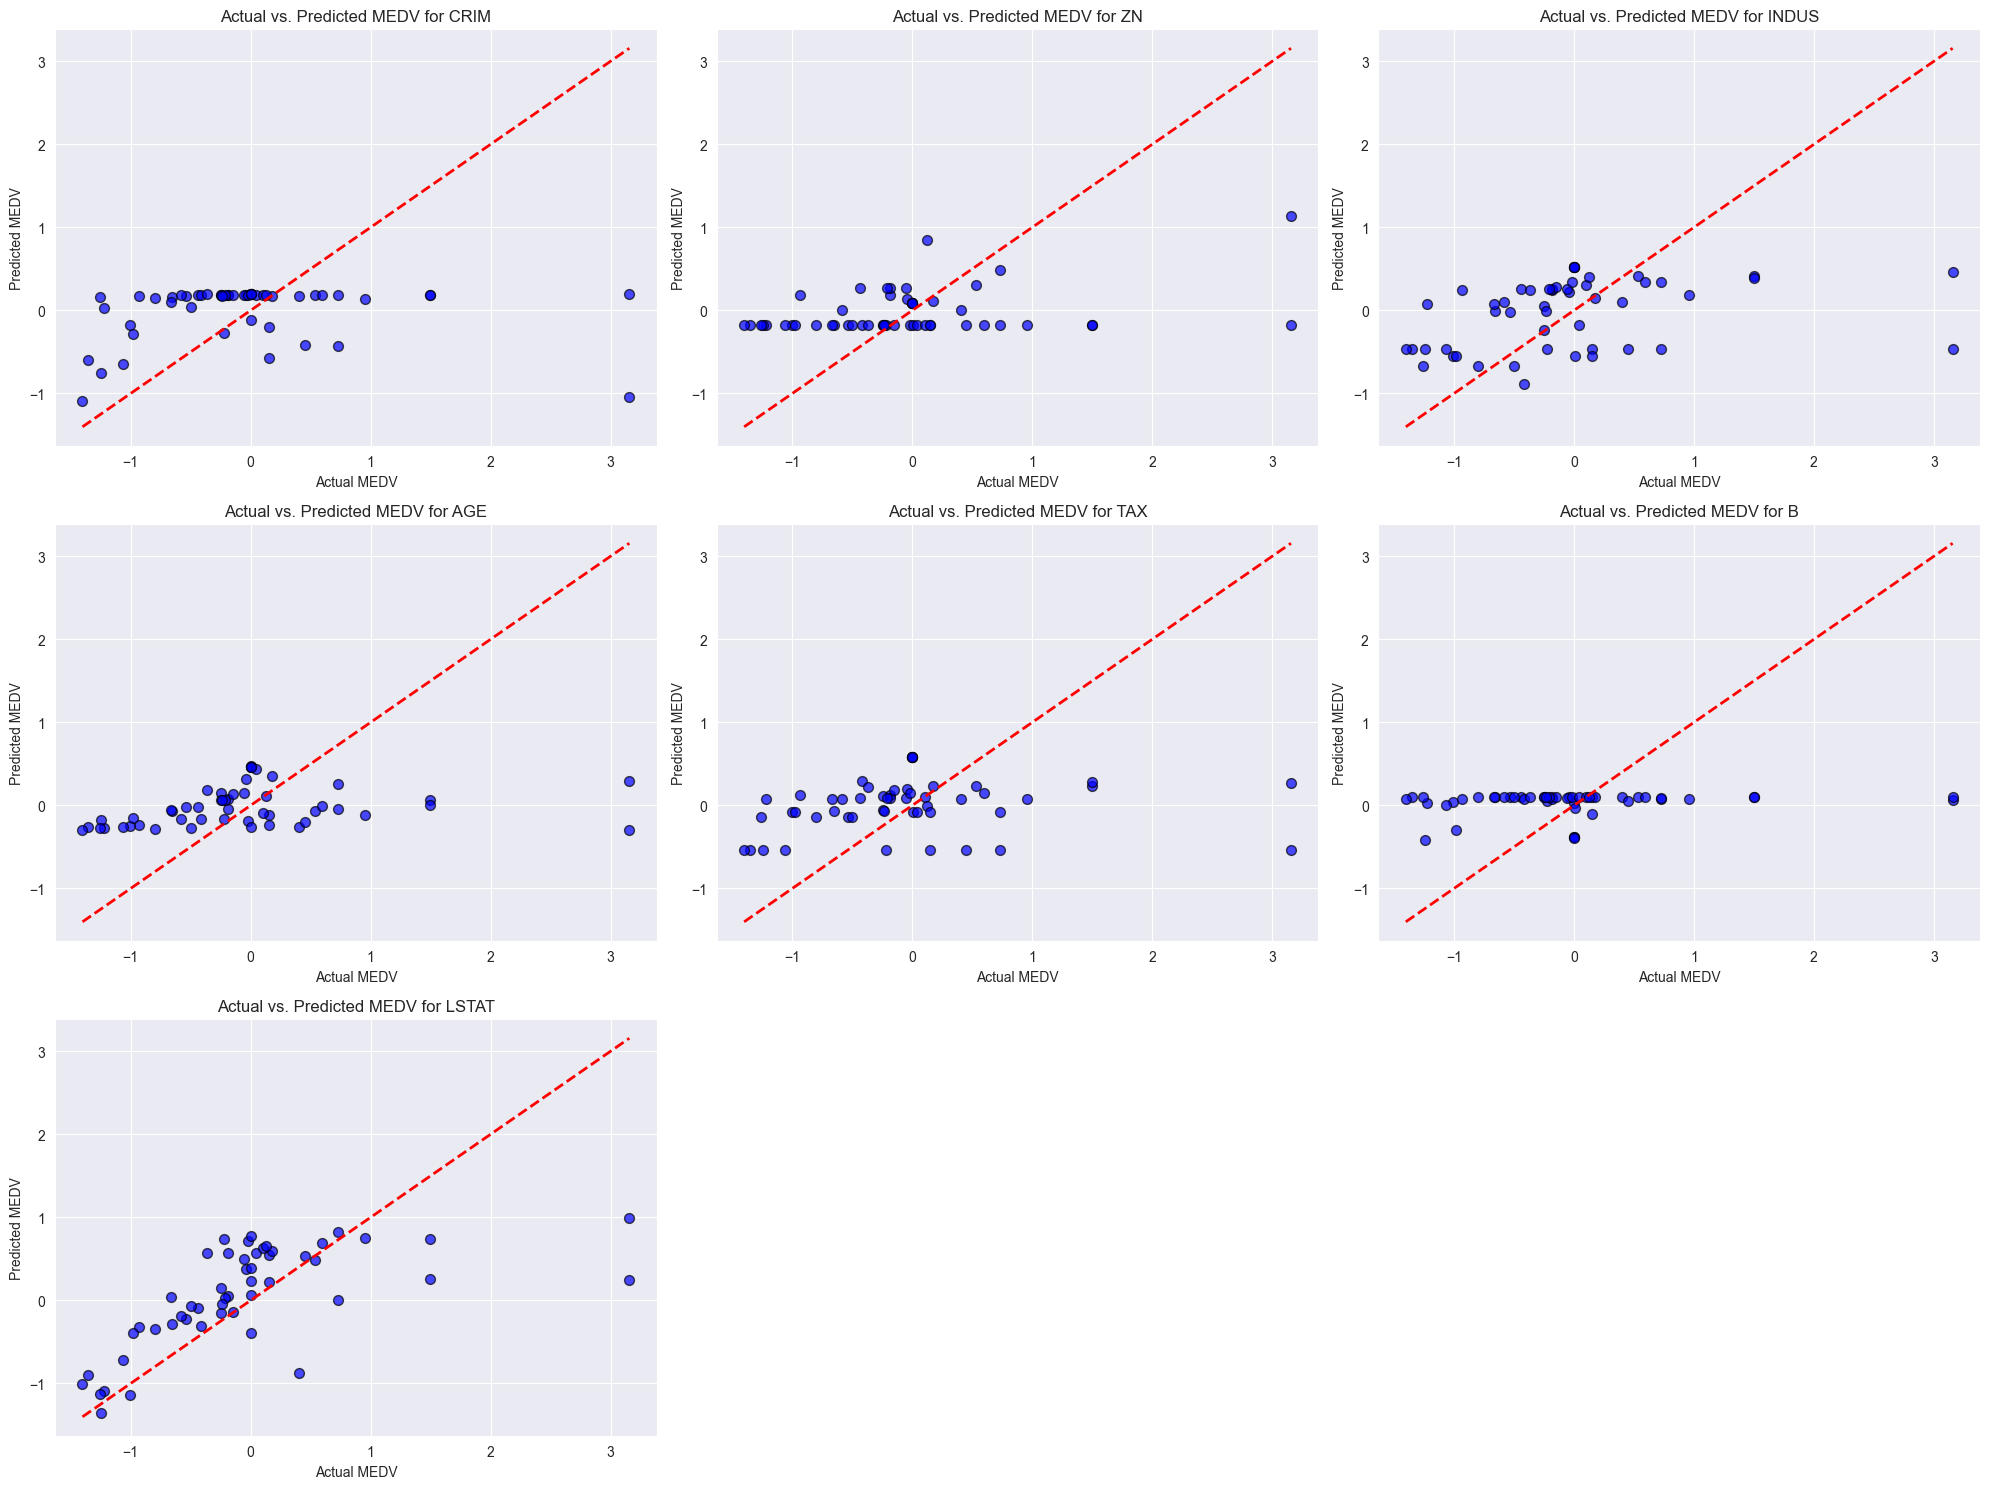

In [307]:
# Number of plots per row
plots_per_row = 3

# Total number of features
total_features = len(designated_feature_list)

# Number of rows needed
num_rows = (total_features + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Iterate over designated features and plot
for idx, feature in enumerate(designated_feature_list):
    y_test, y_pred = predictions[feature]
    
    axs[idx].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=50, marker='o')
    axs[idx].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
    axs[idx].set_xlabel('Actual MEDV')
    axs[idx].set_ylabel('Predicted MEDV')
    axs[idx].set_title(f'Actual vs. Predicted MEDV for {feature}')

# Hide any unused subplots
for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()


### Phase 3: Classification

#### 21. Pruning

Pruning is a technique used in decision trees to reduce their size and complexity by removing sections of the tree that provide little to no additional power in predicting target variables. The main objective of pruning is to improve the model’s generalization capabilities and reduce the likelihood of overfitting.

Pruning can be performed in two main ways:

Pre-pruning (Early Stopping): Stops the tree construction early, before it perfectly classifies the training set. Criteria such as maximum depth, minimum number of samples required to split a node, or minimum number of samples per leaf are set beforehand.
Post-pruning (Pruning after Training): Allows the tree to grow fully and then removes nodes that have little importance. This can be done by:
    Cost complexity pruning (CCP): Selects a subtree that minimizes a cost complexity function.
    Reduced error pruning: Removes nodes if it reduces the overall error rate on a validation set.

Pros and Cons of Pruning

Pros:

Reduces Overfitting: Pruning helps in removing the parts of the tree that capture noise in the data, leading to better generalization on unseen data.
Improves Interpretability: Smaller trees are easier to interpret and understand, which is crucial in many applications where decisions must be transparent.
Reduces Complexity: Simplifies the model by reducing the number of nodes and branches, making it computationally efficient and faster to predict new data points.
Improves Accuracy: By preventing overfitting, pruning often leads to better performance on the test set.

Cons:

Loss of Detail: Pruning may remove nodes that capture important nuances in the data, potentially leading to underfitting.
Parameter Tuning: Requires careful tuning of parameters like minimum samples for splitting or leaf size, which can be computationally intensive.
Dependency on Validation Set: Post-pruning requires a separate validation set to evaluate which nodes to prune, which may not always be feasible with small datasets.
Complexity of Implementation: Implementing post-pruning can be complex and may require more sophisticated algorithms and computational resources.

#### 22. Decision Trees

Using decision trees can have several advantages over other models in specific scenarios:

Interpretability and Transparency:
    Explanation Power: Decision trees are highly interpretable. Each decision path can be visualized, making it easy to understand and explain to non-technical stakeholders.
    Transparency: The rules derived from decision trees can be easily understood and communicated, making them suitable for fields where interpretability is crucial, such as healthcare or finance.

Handling Non-linear Relationships:
    Flexibility: Decision trees can naturally handle non-linear relationships between features and the target variable, which might require more complex transformations or feature engineering in linear models.

Feature Importance:
    Insight into Data: Decision trees provide insights into the importance of different features, which can be valuable for understanding the underlying structure of the data and for feature selection.

No Need for Data Scaling:
    Preprocessing Simplicity: Unlike models like SVMs or neural networks, decision trees do not require feature scaling (normalization or standardization), simplifying the preprocessing pipeline.

Handling of Mixed Data Types:
    Versatility: Decision trees can handle both numerical and categorical data without needing to transform categorical variables into numerical ones, unlike many other models.

Robustness to Outliers:
    Outlier Handling: Decision trees are relatively robust to outliers, as splits are based on thresholds that can effectively ignore outlier values.

Minimal Assumptions:
    Flexibility: Decision trees make few assumptions about the underlying data distribution, making them versatile in different data scenarios.

Handling Missing Values:
    Imputation Flexibility: Decision trees can handle missing values either by imputation during training or by making splits that ignore the missing values, providing more flexibility in dealing with incomplete data.

Ease of Use:
    Implementation: Decision trees are relatively simple to implement and use, making them a good choice for rapid prototyping and initial model development.

Scenarios Where Decision Trees Shine

Exploratory Data Analysis (EDA):
    Decision trees can quickly highlight relationships between features and the target variable, making them useful for exploratory analysis and gaining initial insights from the data.

Domain-Specific Applications:
    Fields like medicine, finance, and biology often require models that are interpretable and can be easily validated by experts in those domains.

Small to Medium-Sized Datasets:
    Decision trees can perform well on small to medium-sized datasets where more complex models might overfit or require significant computational resources.

When Model Interpretability is Critical:
    In applications where understanding the decision process is as important as the prediction accuracy, decision trees provide a clear advantage.

#### 23. KNN Classifier vs. Neural Networks & Logistic Regression

The k-Nearest Neighbors (KNN) classifier differs from other classification methods such as neural networks and logistic regression in several inherent ways, particularly in terms of how they are trained, their complexity, and their operational mechanics. Here are the key differences:
1. Training Process

KNN Classifier:
    No Explicit Training Phase: KNN is an instance-based learning algorithm, meaning it does not explicitly learn a model from the training data. Instead, it stores the entire training dataset and makes predictions based on the similarity between the test instance and the training instances.
    Lazy Learning: KNN is often referred to as a "lazy learner" because it defers the computation until a prediction is requested, as opposed to "eager learners" like neural networks and logistic regression that construct a model during the training phase.

Neural Networks:
    Complex Training Phase: Neural networks require a significant training phase where the model parameters (weights) are optimized using techniques like backpropagation and gradient descent. This process involves multiple iterations over the training data, adjusting the weights to minimize the loss function.
    Eager Learning: Neural networks build a model during training that can generalize to new data points.

Logistic Regression:
    Parameter Estimation: Logistic regression also involves an explicit training phase where it estimates the parameters (coefficients) of the model using optimization techniques like maximum likelihood estimation or gradient descent.
    Model Building: Similar to neural networks, logistic regression constructs a model during the training phase that is used for making predictions on new data.

2. Model Complexity and Structure

KNN Classifier:
    Simplicity: The model is simple as it relies directly on the training instances. There are no coefficients or weights to interpret.
    No Parametric Form: KNN does not assume any underlying parametric form for the decision boundary. The decision boundary is determined by the distribution and distance of the training points.

Neural Networks:
    Complexity: Neural networks can model complex, non-linear relationships through multiple layers and neurons. The model structure can be highly complex and deep, with many parameters (weights and biases) to interpret.
    Parametric Form: The decision boundaries are defined by the learned weights and biases, which can represent highly complex non-linear functions.

Logistic Regression:
    Simplicity: Logistic regression is relatively simple and interpretable, with coefficients indicating the weight of each feature in the decision-making process.
    Linear Boundaries: The decision boundary is linear (or a combination of linear boundaries in the case of multi-class logistic regression), defined by the learned coefficients.

3. Prediction Mechanism

KNN Classifier:
    Distance-Based: Predictions are made by calculating the distance (e.g., Euclidean, Manhattan) between the test instance and all training instances, and then assigning the class based on the majority class among the k-nearest neighbors.
    Instance-Based: Every prediction requires access to the full training dataset, leading to potentially high computation costs for large datasets.

Neural Networks:
    Forward Pass: Predictions are made through a forward pass where the input is propagated through the network's layers, using the learned weights to compute the output.
    Model-Based: Once trained, predictions do not require access to the training data and can be computed quickly.

Logistic Regression:
    Probability Estimation: Predictions are made using the logistic function to estimate the probability of each class based on the weighted sum of the input features.
    Model-Based: Similar to neural networks, predictions are made using the learned model without needing the training data.

4. Scalability and Efficiency

KNN Classifier:
    Scalability Issues: KNN can become computationally expensive and slow for large datasets since it requires distance calculations to all training instances for each prediction.
    Memory Usage: KNN requires storing the entire training dataset in memory, which can be impractical for very large datasets.

Neural Networks:
    Scalable: Neural networks can be scaled to handle very large datasets, although they require significant computational resources for training.
    Efficient Prediction: Once trained, predictions can be made efficiently without reference to the training data.

Logistic Regression:
    Efficiency: Logistic regression is computationally efficient for both training and prediction, especially with smaller to moderately sized datasets.
    Scalable: Can handle large datasets, though it may struggle with very high-dimensional data without proper regularization.

#### 24. One Nearest Neighbor

One Nearest Neighbor (1-NN) is a special case of the k-Nearest Neighbors (k-NN) algorithm, where $ k=1 $. In this case, the algorithm assigns the class of the single closest training instance to the test instance.
How 1-NN Works:

Distance Calculation: For a given test instance, calculate the distance (using a chosen metric such as Euclidean distance) to all instances in the training dataset.
Nearest Neighbor Selection: Identify the single training instance that is closest to the test instance.
Classification: Assign the class label of this nearest neighbor to the test instance.

Pros of 1-NN:

Simplicity: 1-NN is conceptually simple and easy to implement. There is no need for a complex training process, making it straightforward to understand and use.
No Assumptions: The method makes no assumptions about the underlying data distribution, which makes it very flexible and applicable to a wide range of problems.
Adaptability: It can easily adapt to changes in the training data, as it directly uses the training instances without constructing a model.

Cons of 1-NN:

Sensitivity to Noise: 1-NN is highly sensitive to noise and outliers in the training data because the classification is based on a single nearest neighbor. An outlier or noisy data point can significantly affect the prediction.
Computationally Intensive: Since 1-NN requires calculating the distance to every training instance for each prediction, it can be computationally expensive, especially for large datasets.
Storage Requirements: The method requires storing the entire training dataset, which can lead to high memory usage, particularly for large datasets.
Noisy Decision Boundary: The decision boundary of 1-NN can be very irregular and sensitive to the specific training instances, potentially leading to overfitting. It doesn't generalize well to unseen data compared to other methods.
Scalability Issues: As the size of the training dataset increases, both the computational cost and the memory requirements increase, making 1-NN less scalable than some other methods.

#### 25. Distance Calculation Methods

In k-Nearest Neighbors (KNN), the distance metric used to calculate the closeness between instances significantly impacts the algorithm's performance. Different distance metrics can be applied depending on the nature of the data and the problem at hand. Here are some commonly used distance metrics:
1. Euclidean Distance

Formula: $ d(p,q) = \sqrt{\Sigma (p_i - q_i)^2} $
Description: The straight-line distance between two points in Euclidean space. It is the most common distance metric used in KNN.
Pros: Simple and intuitive.
Cons: Sensitive to the scale of the data.

2. Manhattan Distance (L1 Norm or Taxicab Distance)

Formula: $ d(p,q) = \Sigma |p_i - q_i| $
Description: The sum of absolute differences between the coordinates of the points. It measures distance along axes at right angles.
Pros: Less sensitive to outliers compared to Euclidean distance.
Cons: Can be less intuitive for multidimensional data.

3. Minkowski Distance

Formula: $ d(p,q) = (\Sigma |p_i - q_i|^p)^\frac{1}{p} $
Description: Generalizes both Euclidean and Manhattan distances. The parameter pp determines the type of distance:
$ p = 1 $ yields Manhattan distance.
$ p = 2 $ yields Euclidean distance.
Pros: Flexible; can adapt to different distance metrics.
Cons: The choice of pp can be arbitrary and may require tuning.

4. Chebyshev Distance

Formula: $ d(p,q) = max_i |p_i - q_i| $
Description: The maximum absolute difference between the coordinates of the points. It is a special case of the Minkowski distance with pp approaching infinity.
Pros: Useful in scenarios where movement is restricted to a grid.
Cons: Can be less intuitive in higher dimensions.

5. Cosine Similarity

Formula: $ similarity(p,q) = \frac{\Sigma p_iq_i}{\sqrt{\Sigma p_i^2} \sqrt{\Sigma q_i^2}} $ 
Description: Measures the cosine of the angle between two non-zero vectors. It is often used for text data and high-dimensional sparse data.
Pros: Effective for measuring similarity in high-dimensional spaces.
Cons: Does not directly measure distance; needs conversion to a distance metric.

6. Mahalanobis Distance

Formula: $ d(p,q) = \sqrt{(p-q)^T S^{-1} (p-q)} $
Description: A distance measure that accounts for correlations between variables. Here, SS is the covariance matrix of the dataset.
Pros: Considers the distribution and correlation of the data.
Cons: Computationally intensive; requires estimation of the covariance matrix.

7. Hamming Distance

Formula: $ d(p,q) = \Sigma (p_i \neq q_i) $
Description: The number of positions at which the corresponding symbols differ. It is used for categorical data.
Pros: Simple and useful for categorical strings or binary data.
Cons: Not suitable for continuous data.

#### 26.1 Dividing the Target Feature (MEDV) into Categories

In [308]:
# Load data
df = pd.read_excel('DataSet_3_standard.xlsx')

# Define deciles for MEDV
df['MEDV_Decile'] = pd.qcut(df['MEDV'], 10, labels=False)

# Label the categories
df['MEDV_Category'] = pd.cut(df['MEDV_Decile'], 
                             bins=[-1, 1, 7, 9], 
                             labels=['economic', 'ordinary', 'luxury'])

# Drop the temporary decile column
df.drop(columns=['MEDV_Decile'], inplace=True)

# Print to check the distribution
print(df['MEDV_Category'].value_counts())

# Save the modified DataFrame to a new Excel file
df.to_excel('DataSet_4.xlsx', index=False)


MEDV_Category
ordinary    303
economic    102
luxury      101
Name: count, dtype: int64


#### 26.2 Implement Decision Tree and K-Nearest-Neighbors Models

In [309]:
# Load data
df = pd.read_excel('DataSet_4.xlsx')

# Separate features and target
X = df.drop(['MEDV', 'MEDV_Category'], axis=1)
y = df['MEDV_Category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=28)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(classification_report(y_test, dt_pred_test))
print(f"Training Accuracy: {accuracy_score(y_train, dt_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, dt_pred_test):.4f}")

# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Classifier:")
print(classification_report(y_test, knn_pred_test))
print(f"Training Accuracy: {accuracy_score(y_train, knn_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, knn_pred_test):.4f}")


Decision Tree Classifier:
              precision    recall  f1-score   support

    economic       0.89      0.76      0.82        21
      luxury       0.60      0.75      0.67        12
    ordinary       0.88      0.88      0.88        69

    accuracy                           0.84       102
   macro avg       0.79      0.80      0.79       102
weighted avg       0.85      0.84      0.85       102

Training Accuracy: 1.0000
Test Accuracy: 0.8431

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

    economic       0.84      0.76      0.80        21
      luxury       0.58      0.58      0.58        12
    ordinary       0.89      0.91      0.90        69

    accuracy                           0.84       102
   macro avg       0.77      0.75      0.76       102
weighted avg       0.84      0.84      0.84       102

Training Accuracy: 0.8564
Test Accuracy: 0.8431


#### Analysis of Results

Decision Tree Classifier

Precision, Recall, and F1-Score:
    Economic: High precision (0.89) and recall (0.76) indicate good performance in correctly identifying economic class, but some economic instances are misclassified.
    Luxury: Lower precision (0.60) and recall (0.75), indicating challenges in correctly identifying luxury class, with more misclassifications.
    Ordinary: High precision (0.88) and recall (0.88) indicate strong performance in correctly identifying ordinary class.
Overall Performance:
    Accuracy: 84% on the test set.
    Training Accuracy: 100%, indicating potential overfitting as the model perfectly fits the training data but performs slightly lower on the test data.

K-Nearest Neighbors Classifier

Precision, Recall, and F1-Score:
    Economic: Slightly lower precision (0.84) and recall (0.76) compared to Decision Tree, still good performance.
    Luxury: Lower precision (0.58) and recall (0.58), similar to Decision Tree, showing difficulty in correctly classifying luxury instances.
    Ordinary: High precision (0.89) and recall (0.91), slightly better than Decision Tree, indicating strong performance.
Overall Performance:
    Accuracy: 84% on the test set.
    Training Accuracy: 85.6%, indicating a good fit with slight underfitting, as training accuracy is close to test accuracy.

Both models show similar overall test accuracy (84%), with Decision Tree showing potential overfitting and KNN showing slight underfitting. The main challenge for both models is correctly classifying the luxury class. Further tuning and cross-validation may help improve the performance, especially for the luxury class.

#### 27.1 Hyperparameter Tuning using GridSearchCV

GridSearchCV is a method provided by the scikit-learn library in Python for optimizing the hyperparameters of a machine learning model. It systematically works through multiple combinations of parameter values, cross-validating each combination to determine which set of parameters provides the best performance.

Steps of GridSearchCV:
1. Parameter Grid Definition:

Define a dictionary where keys are the hyperparameters to tune and values are the lists of settings to try.

2. Cross-Validation:

The dataset is split into a specified number of folds (e.g., k-fold cross-validation).
For each combination of hyperparameters, the model is trained on k-1 folds and tested on the remaining fold. This process is repeated for each fold, ensuring each fold serves as a test set once.

3. Model Evaluation:

Performance metrics (e.g., accuracy, precision, recall) are averaged across the folds to evaluate each hyperparameter combination.

4. Best Hyperparameters Selection:

The combination of hyperparameters that yields the best cross-validated performance is selected as the optimal set.

5. Refitting:

The final model is trained using the entire training set with the optimal hyperparameters.

In [310]:
# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=28), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
best_dt_model = dt_grid_search.best_estimator_
best_dt_pred_train = best_dt_model.predict(X_train)
best_dt_pred_test = best_dt_model.predict(X_test)
print("Optimized Decision Tree Classifier:")
print(classification_report(y_test, best_dt_pred_test))
print(f"Training Accuracy: {accuracy_score(y_train, best_dt_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, best_dt_pred_test):.4f}")

# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

print("\nBest parameters for KNN:", knn_grid_search.best_params_)
best_knn_model = knn_grid_search.best_estimator_
best_knn_pred_train = best_knn_model.predict(X_train)
best_knn_pred_test = best_knn_model.predict(X_test)
print("Optimized K-Nearest Neighbors Classifier:")
print(classification_report(y_test, best_knn_pred_test))
print(f"Training Accuracy: {accuracy_score(y_train, best_knn_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, best_knn_pred_test):.4f}")


Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Optimized Decision Tree Classifier:
              precision    recall  f1-score   support

    economic       0.88      0.71      0.79        21
      luxury       0.58      0.58      0.58        12
    ordinary       0.85      0.90      0.87        69

    accuracy                           0.82       102
   macro avg       0.77      0.73      0.75       102
weighted avg       0.82      0.82      0.82       102

Training Accuracy: 0.8713
Test Accuracy: 0.8235

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Optimized K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

    economic       0.83      0.71      0.77        21
      luxury       0.70      0.58      0.64        12
    ordinary       0.86      0.93      0.90        69

    accuracy                           0.84       102
   macro avg       0.80      0.7

#### Analysis of Results

Decision Tree Classifier

Precision, Recall, and F1-Score:
    Economic: Precision (0.88) and recall (0.71) indicate good performance in correctly identifying the economic class, though some economic instances are misclassified.
    Luxury: Lower precision (0.58) and recall (0.58) indicate challenges in correctly identifying the luxury class, with more misclassifications.
    Ordinary: High precision (0.85) and recall (0.90) indicate strong performance in correctly identifying the ordinary class.
Overall Performance:
    Accuracy: 82% on the test set.
    Training Accuracy: 87.1%, indicating a good fit with slight overfitting as the model performs perfectly on the training data but slightly lower on the test data.

K-Nearest Neighbors Classifier

Precision, Recall, and F1-Score:
    Economic: Precision (0.83) and recall (0.71) indicate good performance in correctly identifying the economic class, though some economic instances are misclassified.
    Luxury: Lower precision (0.70) and recall (0.58), indicating challenges in correctly identifying the luxury class, but better than Decision Tree.
    Ordinary: High precision (0.86) and recall (0.93), indicating strong performance in correctly identifying the ordinary class.

Overall Performance:
    Accuracy: 84% on the test set.
    Training Accuracy: 87.1%, indicating a good fit with slight underfitting, as the training accuracy is close to the test accuracy.

Both models exhibit similar overall performance, achieving an accuracy of 82-84% on the test set. The Decision Tree classifier displays slight overfitting, while the K-Nearest Neighbors classifier demonstrates slight underfitting. The main challenge for both models remains correctly classifying the luxury class, indicating the need for further refinement. However, the K-Nearest Neighbors classifier, with optimized hyperparameters, exhibits slightly better performance in distinguishing the luxury class compared to the Decision Tree classifier. Further tuning and cross-validation may enhance the models' ability to accurately classify all classes.

#### 27.2 Selecting the Best Model

To determine the best model choice between the Decision Tree Classifier and the K-Nearest Neighbors Classifier, we can consider various factors such as performance metrics, computational complexity, interpretability, and the specific requirements of the task at hand.

Let's compare the two models based on their performance metrics:

Accuracy: Both models achieve similar accuracy on the test set, with the Decision Tree Classifier achieving 82% and the K-Nearest Neighbors Classifier achieving 84%.

Precision, Recall, and F1-Score: We observe differences in precision, recall, and F1-score for each class between the two models. Specifically, the K-Nearest Neighbors Classifier shows slightly better performance in correctly identifying the luxury class compared to the Decision Tree Classifier.

Training Accuracy: Both models have comparable training accuracy, with slight indications of overfitting in the Decision Tree Classifier and slight underfitting in the K-Nearest Neighbors Classifier.

Considering these factors, if computational complexity is not a concern and interpretability is desired, the Decision Tree Classifier might be a suitable choice. However, if computational efficiency is important and the ability to handle non-linear relationships in the data is crucial, the K-Nearest Neighbors Classifier could be preferred.

#### 28. Final Decision Tree

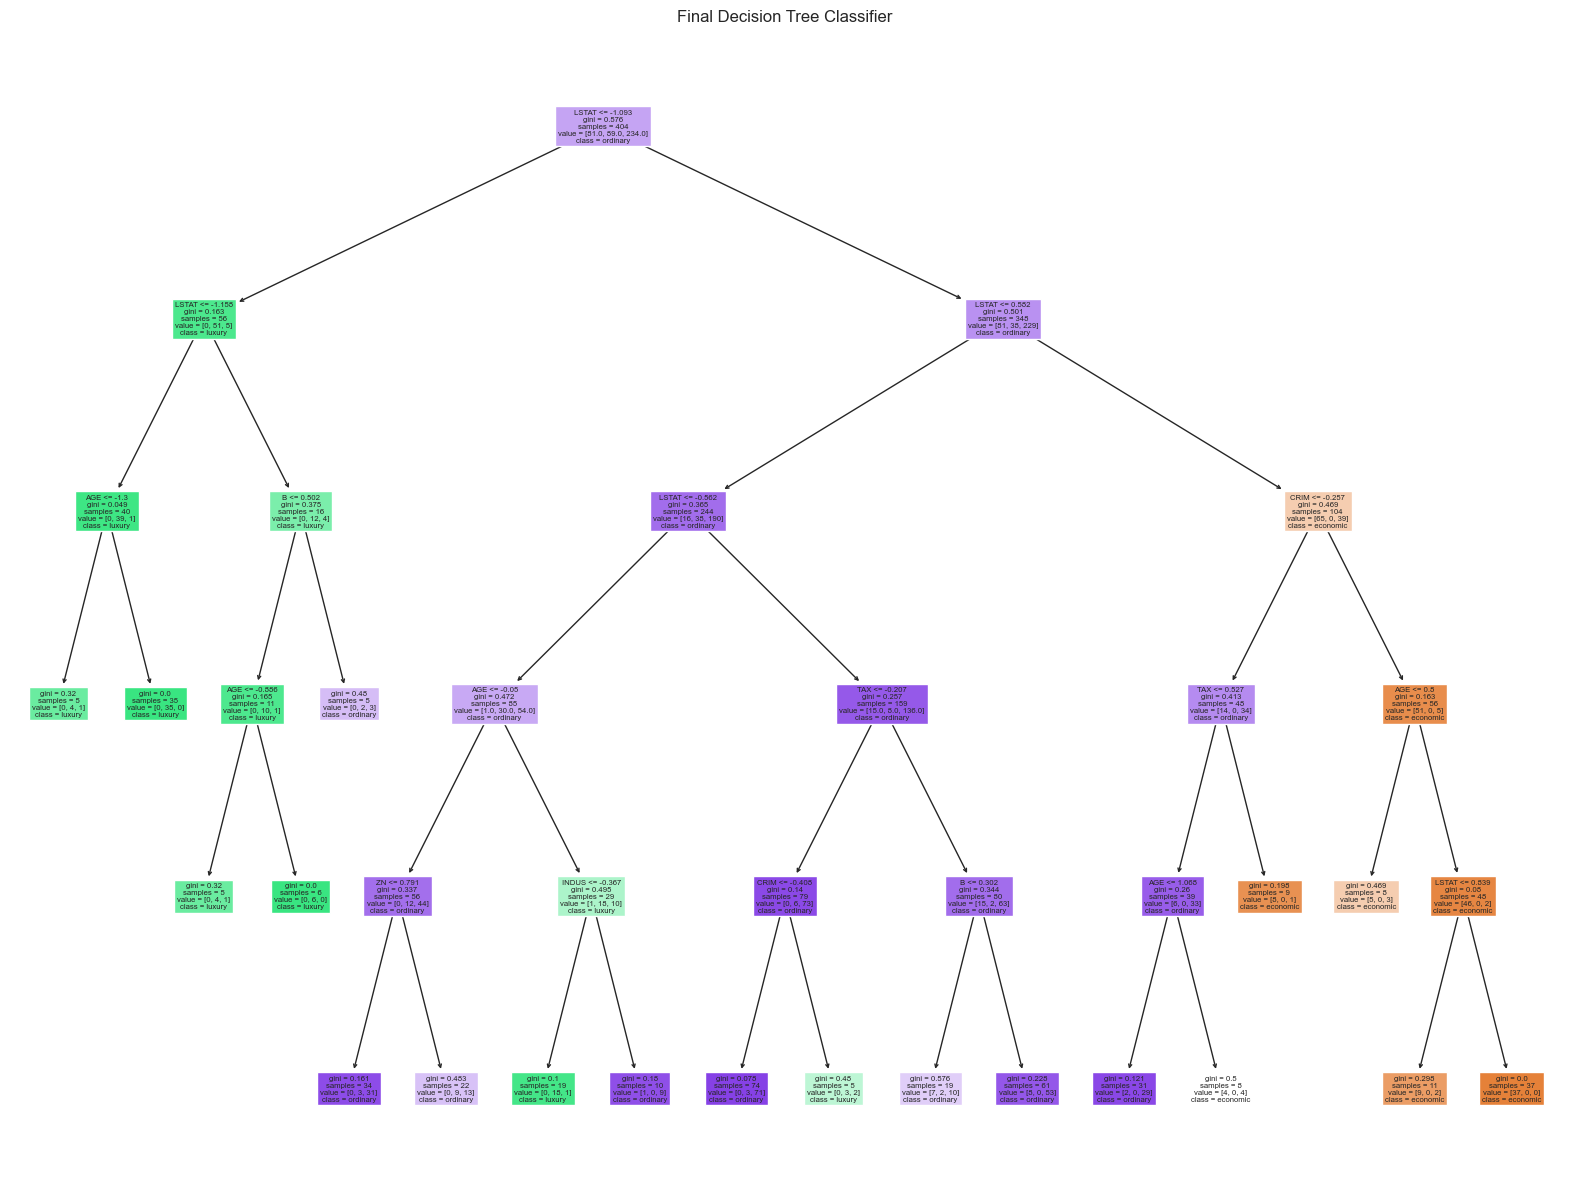

In [311]:
# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['economic', 'luxury', 'ordinary'], filled=True)
plt.title('Final Decision Tree Classifier')
plt.show()

#### 29. Overfitting & Underfitting

Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations that are specific to the training set but do not generalize well to unseen data. This results in a high training accuracy but poor performance on new data. 

Underfitting occurs when a model is too simplistic to capture the underlying patterns in the data, resulting in poor performance both on the training and test data.

In our implemented models:

Decision Tree Classifier: The training accuracy is 100%, indicating potential overfitting as the model perfectly fits the training data but performs slightly lower on the test data. This suggests that the decision tree classifier has learned the training data too well, capturing noise or outliers that do not generalize well to unseen data.

K-Nearest Neighbors Classifier: The training accuracy is 85.6%, which is slightly lower than the test accuracy of 84%, indicating a good fit with slight underfitting. While the model performs well on both training and test data, the training accuracy being slightly lower suggests that the model may not capture all the underlying patterns in the data.

### Phase 4: Ensemble Methods

#### 30. Ensemble Methods

Ensemble methods are powerful techniques in machine learning where multiple models are combined to produce better predictive performance than any individual model alone. This is achieved by leveraging the collective intelligence of diverse models, each with its strengths and weaknesses, to make more accurate and robust predictions.

The main idea behind ensemble methods is that different models may excel at capturing different aspects of the data or may make different errors. By combining these diverse models, ensemble methods aim to reduce the risk of overfitting and improve generalization performance on unseen data.

Ensemble methods have become increasingly important in machine learning due to their ability to significantly enhance predictive performance across various domains and datasets. They are widely used in practice for tasks such as classification, regression, and anomaly detection, and have been instrumental in winning numerous machine learning competitions and challenges.

#### 31. Bagging & Boosting

Boosting and Bagging are ensemble methods used in machine learning to improve the performance of predictive models by combining multiple weaker models into a stronger one.

Bagging (Bootstrap Aggregating):

In Bagging, multiple instances of the same base model are trained independently on different subsets of the training data.
Each subset is sampled with replacement (bootstrap sampling), creating variations in the training sets.
After training, the predictions from all models are aggregated, usually by averaging for regression tasks or voting for classification tasks.
Bagging helps to reduce variance and stabilize the model by averaging out the errors made by individual models.
Examples include Random Forests, where decision trees are used as base models, and each tree is trained on a random subset of features and samples.

Boosting:

Boosting works by sequentially building a series of weak learners (models that perform slightly better than random guessing).
Each new model in the sequence focuses on the errors made by the previous ones, with higher weights assigned to misclassified instances.
The final prediction is made by aggregating the predictions of all models, typically by weighted averaging or majority voting.
Boosting aims to reduce bias and improve predictive accuracy by iteratively fitting new models to the errors of the previous ones.
Examples include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and XGBoost.

Differences:

Training Approach:
    Bagging: Models are trained independently in parallel.
    Boosting: Models are trained sequentially, with each subsequent model focusing on the errors made by the previous ones.

Sample Selection:
    Bagging: Random subsets of the training data are sampled with replacement (bootstrap sampling).
    Boosting: Each instance in the training data is weighted based on its importance, with higher weights assigned to misclassified instances.

Aggregation:
    Bagging: Predictions are aggregated by averaging (for regression) or voting (for classification).
    Boosting: Predictions are aggregated using weighted averaging or weighted voting, where the weights are determined by the performance of each model.

Performance:
    Bagging: Reduces variance and stabilizes the model by averaging out errors.
    Boosting: Reduces bias and improves predictive accuracy by focusing on the errors of previous models.

#### 32. Random Forests Method

Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve the accuracy and robustness of the model. Here's how it works:

Bootstrap Sampling:
    Random Forest starts by creating multiple decision trees, each trained on a different subset of the training data.
    Each subset is sampled with replacement from the original training data, a process known as bootstrap sampling.
    This creates variations in the training sets for each tree, leading to diversity among the individual trees.

Feature Randomization:
    In addition to sampling the data, Random Forest also randomly selects a subset of features to consider when splitting each node of the decision tree.
    This feature randomization further increases the diversity among the trees and prevents them from becoming too correlated.

Decision Tree Training:
    Each decision tree in the Random Forest is trained independently using the bootstrapped training set and the randomly selected features.
    The trees are typically grown to their maximum depth without pruning to capture complex relationships in the data.

Voting or Averaging:
    Once all trees are trained, predictions are made by aggregating the predictions of individual trees.
    For classification tasks, the final prediction is typically determined by majority voting among the trees.
    For regression tasks, the final prediction is often the average of the predictions from all trees.

Reducing Variance:
    By combining the predictions of multiple trees trained on different subsets of data, Random Forest reduces variance and overfitting.
    The diversity among the trees ensures that the model generalizes well to unseen data and is less sensitive to noise and outliers in the training set.

Random Forest is known for its robustness, scalability, and ability to handle high-dimensional data with complex interactions. It's widely used in various applications, including classification, regression, and anomaly detection, due to its excellent performance and ease of use.

#### 33. Bootstrapping

Bootstrapping is a resampling technique used in Random Forests to create multiple training datasets from the original data. Here's how it works and how it influences the results of the model:

Sampling with Replacement:
    Bootstrapping involves randomly sampling data points from the original dataset with replacement.
    Each bootstrap sample has the same size as the original dataset but may contain duplicate instances and omit others.

Creating Diverse Training Sets:
    By creating multiple bootstrap samples, Bootstrapping generates diverse training sets for each decision tree in the Random Forest.
    Each decision tree is trained on a different subset of the data, leading to variations in the learned patterns.

Increasing Model Variability:
    Bootstrapping increases the variability among the individual decision trees in the Random Forest.
    Since each tree is trained on a different subset of the data, they capture different aspects of the underlying data distribution.

Reducing Overfitting:
    The variability introduced by Bootstrapping helps prevent overfitting in Random Forests.
    By training multiple trees on different subsets of the data and combining their predictions, Random Forests generalize well to unseen data and are less sensitive to noise and outliers.

Improving Model Performance:
    Bootstrapping improves the performance of Random Forests by reducing variance and improving accuracy.
    The ensemble of diverse decision trees trained on bootstrapped samples leads to more robust and reliable predictions.

Overall, Bootstrapping is a key component of Random Forests that enhances their predictive power by creating diverse training sets and reducing overfitting. It plays a crucial role in improving the generalization performance of the model and making it more robust to variations in the data.

#### 34. Number of Decision Trees in Random Forests

Effect on Model Performance:
The number of decision trees in a Random Forest indeed influences the efficiency and performance of the model. Let's delve into how it affects the model and empirically determine the best number of trees.
Influence on Model Performance

Improvement in Performance:
Increasing the Number of Trees: Generally, adding more trees enhances the model's performance by reducing variance and improving robustness in predictions. Each additional tree allows the model to capture more intricate patterns and interactions within the data.

Diminishing Returns:
After a certain threshold, the performance gains become marginal. This point is termed the point of diminishing returns. Further increasing the number of trees beyond this threshold does not significantly enhance the model's accuracy but increases computational overhead.

Mitigation of Overfitting:
Random Forests are inherently less prone to overfitting compared to single decision trees due to the ensemble averaging effect. Nonetheless, too few trees can still lead to overfitting, necessitating a balance between the number of trees and model generalization.
Empirical Best Number of Trees

Typical Range:
Empirically, a range of 100 to 500 trees is commonly used. This range strikes a balance between performance and computational efficiency across various datasets.

Cross-Validation Approach:
Determining the optimal number of trees often involves employing cross-validation techniques. By evaluating the model's performance on different numbers of trees, the number that yields the best performance for the specific dataset can be identified.

Default Values:
Many implementations of Random Forests, such as those in scikit-learn, default to 100 trees. This default value serves as a good starting point for many practical scenarios.

Evaluation Metrics:
Metrics like Out-of-Bag (OOB) error, cross-validation scores, or performance on a test set can guide the decision on the optimal number of trees. Monitoring these metrics helps determine when adding more trees no longer provides significant improvements.

Conclusion:

The number of decision trees in a Random Forest significantly impacts its performance and computational efficiency. While increasing the number of trees generally enhances performance, the returns diminish after a certain threshold. Empirically, leveraging 100 to 500 trees is often effective, with the optimal number determined through cross-validation and evaluation of dataset-specific characteristics.

#### 35. Suitability of Random Forests

When Random Forests are Not Suitable:

Interpretability Requirement:
If interpretability of the model is paramount, Random Forests might not be the best choice. The ensemble nature of Random Forests makes it challenging to interpret individual decision trees and their corresponding predictions.

Large Dataset with Limited Resources:
For extremely large datasets with limited computational resources, training a Random Forest with a large number of trees can be time-consuming and memory-intensive. In such cases, more efficient models may be preferred.

Linear Relationships:
When the underlying relationships in the data are predominantly linear and can be effectively captured by simpler models like linear regression, using Random Forests may introduce unnecessary complexity without significant performance gains.

When Using Random Forests is Suggested:

High-Dimensional Data:
Random Forests are effective for high-dimensional datasets with numerous features, where they can automatically select informative features and handle interactions between them, thus mitigating the curse of dimensionality.

Nonlinear Relationships:
In scenarios where the relationships between features and the target variable are nonlinear or complex, Random Forests excel at capturing these intricate patterns and making accurate predictions.

Robustness to Overfitting:
Random Forests are inherently robust to overfitting due to the ensemble averaging effect, making them suitable for datasets with noisy or overlapping classes, where simpler models might struggle.

Versatility:
Random Forests are versatile and can be applied to a wide range of tasks, including classification, regression, and outlier detection, making them a go-to choice for many machine learning problems.

Ensemble Learning:
Leveraging the power of ensemble learning, Random Forests combine multiple decision trees to provide more accurate and stable predictions compared to individual trees, making them particularly useful when high predictive performance is desired.

In summary, Random Forests are suggested for scenarios involving high-dimensional data, nonlinear relationships, and a need for robust and accurate predictions, while they may not be suitable for cases requiring interpretability or when computational resources are limited.

#### 36. Effect of Random Forest on Variance

Using Random Forest can help reduce variance in the model predictions. Here's how:

Bootstrap Sampling:
Random Forest employs bootstrapping, which involves sampling observations with replacement from the original dataset to create multiple subsets for building individual trees. This sampling process introduces randomness into each tree's training data, leading to variations in the models. By averaging the predictions of multiple trees, Random Forest mitigates the impact of individual tree variances on the overall model predictions.

Feature Randomness:
In addition to sampling data, Random Forest introduces randomness in feature selection for each split in the decision trees. Instead of considering all features at each node, it randomly selects a subset of features. This helps in reducing the correlation between individual trees and promotes diversity among them, thereby reducing the overall variance.

Ensemble Averaging:
The final prediction of a Random Forest is the average (for regression) or majority vote (for classification) of predictions made by individual trees. This ensemble averaging mechanism further smooths out variations and stabilizes the predictions, leading to lower variance in the model output.

Overall, by leveraging bootstrap sampling, feature randomness, and ensemble averaging, Random Forest effectively reduces variance in model predictions compared to single decision trees, making it a robust and reliable machine learning algorithm.

#### 37. Random Forest Hyperparameters using GridSearchCV

The hyperparameters of Random Forest include:

n_estimators: The number of decision trees in the forest.
max_features: The number of features to consider when looking for the best split.
max_depth: The maximum depth of the trees.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
bootstrap: Whether bootstrap samples are used when building trees.
random_state: Seed for random number generation.

In [315]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=28)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

# Train the Random Forest model with the best parameters
best_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=28)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model
best_rf_train_accuracy = best_rf_classifier.score(X_train, y_train)
best_rf_test_accuracy = best_rf_classifier.score(X_test, y_test)

print(f"Random Forest Model Training Accuracy with Best Hyperparameters: {best_rf_train_accuracy:.4f}")
print(f"Random Forest Model Test Accuracy with Best Hyperparameters: {best_rf_test_accuracy:.4f}")


Best hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest Model Training Accuracy with Best Hyperparameters: 0.9678
Random Forest Model Test Accuracy with Best Hyperparameters: 0.8922


#### Analysis of Results

The Random Forest model was optimized using GridSearchCV to find the best hyperparameters. After training the model with the optimal hyperparameters, the training accuracy reached approximately 96.78%, indicating a good fit to the training data. The test accuracy, which measures the model's performance on unseen data, achieved around 89.22%. These results suggest that the optimized Random Forest model performs well both on the training and test datasets, demonstrating its effectiveness in classification tasks.

### Phase 5: Support Vector Machine

#### 40.1 Classify the Data with RBF and Linear Kernels

In [319]:
# Load data
df = pd.read_excel('DataSet_4.xlsx')

# Separate features and target
X = df.drop(['MEDV', 'MEDV_Category'], axis=1)
y = df['MEDV_Category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Report results for RBF kernel
print("RBF Kernel SVM:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rbf))
print(f"\nRBF Kernel SVM Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")

# Report results for Linear kernel
print("\nLinear Kernel SVM:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_linear))
print(f"\nLinear Kernel SVM Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")


RBF Kernel SVM:

Confusion Matrix:

[[14  0  7]
 [ 1  9  2]
 [ 1  7 61]]

Classification Report:

              precision    recall  f1-score   support

    economic       0.88      0.67      0.76        21
      luxury       0.56      0.75      0.64        12
    ordinary       0.87      0.88      0.88        69

    accuracy                           0.82       102
   macro avg       0.77      0.77      0.76       102
weighted avg       0.84      0.82      0.83       102


RBF Kernel SVM Accuracy: 0.8235

Linear Kernel SVM:

Confusion Matrix:

[[15  0  6]
 [ 0 10  2]
 [ 1  7 61]]

Classification Report:

              precision    recall  f1-score   support

    economic       0.94      0.71      0.81        21
      luxury       0.59      0.83      0.69        12
    ordinary       0.88      0.88      0.88        69

    accuracy                           0.84       102
   macro avg       0.80      0.81      0.79       102
weighted avg       0.86      0.84      0.85       102


Line

#### 40.2 Analysis of Results

RBF Kernel SVM

Economic Class: The precision is high at 0.88, indicating that most instances classified as economic are correct. The recall is lower at 0.67, meaning a significant portion of economic instances are misclassified as other classes.

Luxury Class: Precision is moderate at 0.56, showing that there are quite a few false positives. The recall is better at 0.75, indicating a fair ability to identify luxury instances.

Ordinary Class: Both precision and recall are high at 0.87 and 0.88, respectively, suggesting strong performance in correctly identifying ordinary instances.

Overall Accuracy: The model has an accuracy of 82.35% on the test set.

Macro Average: The precision, recall, and F1-scores are balanced across classes, with averages around 0.77, indicating a generally balanced performance.

Weighted Average: The averages are slightly higher, driven by the larger number of ordinary instances, reflecting a well-performing model.

Linear Kernel SVM

Economic Class: The precision is very high at 0.94, meaning most predicted economic instances are correct. The recall is 0.71, indicating that some economic instances are still misclassified.

Luxury Class: Precision is 0.59, indicating moderate performance with false positives. The recall is higher at 0.83, showing good sensitivity to identifying luxury instances.

Ordinary Class: Both precision and recall are high at 0.88, suggesting consistent and reliable performance.

Overall Accuracy: The model has an accuracy of 84.31% on the test set.

Macro Average: Slightly higher than the RBF kernel, with averages around 0.80, indicating good balance across classes.

Weighted Average: Higher than the RBF kernel, with averages around 0.85, reflecting the strong performance for the majority class (ordinary).
    
Comparison and Analysis

Accuracy: The Linear Kernel SVM shows a slightly higher accuracy (84.31%) compared to the RBF Kernel SVM (82.35%).
Precision and Recall: Both models show high precision and recall for the ordinary class. The Linear Kernel SVM has a higher precision for the economic class, whereas the RBF Kernel SVM shows better recall for the luxury class.
Balance of Performance: The Linear Kernel SVM has slightly better-balanced metrics across classes, as seen in the macro averages.
Overall Suggestion: The Linear Kernel SVM slightly outperforms the RBF Kernel SVM in terms of accuracy and balanced performance. It is recommended to use the Linear Kernel SVM for this dataset.

#### 40.3 Grid Search vs. Random Search

Grid Search is more exhaustive and ensures the best parameters are found by evaluating all combinations. However, it is computationally expensive. Random Search, while faster, may miss the optimal combination. Given the context of SVMs with potentially large parameter spaces, starting with Random Search is often more efficient. After narrowing down the ranges, Grid Search can be used for fine-tuning.

In [323]:
# Define parameter grids
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

param_grid_linear = {
    'C': [0.1, 1, 10, 100]
}

# Random Search parameters
param_dist_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

param_dist_linear = {
    'C': [0.1, 1, 10, 100]
}

# Grid Search with RBF kernel
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X_train, y_train)
print("\nBest parameters for RBF kernel (Grid Search):", grid_search_rbf.best_params_)
print(f"Best Score: {grid_search_rbf.best_score_:.4f}")

# Random Search with RBF kernel
random_search_rbf = RandomizedSearchCV(SVC(kernel='rbf'), param_dist_rbf, n_iter=10, cv=5, scoring='accuracy', random_state=28)
random_search_rbf.fit(X_train, y_train)
print("\nBest parameters for RBF kernel (Random Search):", random_search_rbf.best_params_)
print(f"Best Score: {random_search_rbf.best_score_:.4f}")

# Grid Search with Linear kernel
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X_train, y_train)
print("\nBest parameters for Linear kernel (Grid Search):", grid_search_linear.best_params_)
print(f"Best Score: {grid_search_linear.best_score_:.4f}")

# Random Search with Linear kernel
random_search_linear = RandomizedSearchCV(SVC(kernel='linear'), param_dist_linear, n_iter=10, cv=5, scoring='accuracy', random_state=28)
random_search_linear.fit(X_train, y_train)
print("\nBest parameters for Linear kernel (Random Search):", random_search_linear.best_params_)
print(f"Best Score: {random_search_linear.best_score_:.4f}")



Best parameters for RBF kernel (Grid Search): {'C': 100, 'gamma': 0.01}
Best Score: 0.8119

Best parameters for RBF kernel (Random Search): {'gamma': 0.01, 'C': 100}
Best Score: 0.8119

Best parameters for Linear kernel (Grid Search): {'C': 10}
Best Score: 0.8094

Best parameters for Linear kernel (Random Search): {'C': 10}
Best Score: 0.8094


#### 40.4 Analysis of Results

RBF Kernel SVM

Both Grid Search and Random Search identified the same optimal hyperparameters for the RBF kernel.
The best accuracy score achieved during cross-validation was 0.8119.
The consistency in results between Grid Search and Random Search indicates robustness in these parameter settings.

Linear Kernel SVM

Both Grid Search and Random Search identified the same optimal hyperparameters for the Linear kernel.
The best accuracy score achieved during cross-validation was 0.8094.
Similar to the RBF kernel, the consistency in results between Grid Search and Random Search confirms the stability of these parameter settings.

Comparison and Best Classifier:

The RBF Kernel SVM slightly outperforms the Linear Kernel SVM with a best score of 0.8119 compared to 0.8094.
Since the difference in performance is small but consistent, the RBF Kernel SVM is the better classifier for this dataset based on the achieved cross-validation scores.

Final Recommendation:

Best Classifier: RBF Kernel SVM
Optimal Hyperparameters: {'C': 100, 'gamma': 0.01}
Performance: Best cross-validation score of 0.8119

### Phase 6: Model Evaluation